In [ ]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
def learning_weights(input, size):
  W  = np.einsum('ik,ij->kj', input, input)/size   # computing weights
  return W

# Updating
def updating_units(weights, input):
  output = np.sign(np.einsum('ij,i -> j', weights, input))
  return output

2.1 Hebbian Learning

In [ ]:
x1 = np.array((-1, -1, 1, -1, 1, -1, -1, 1))
x2 = np.array((-1, -1, -1, -1, -1, 1, -1, -1))
x3 = np.array((-1, 1, 1, -1, -1, 1, -1, 1))
x = np.vstack((x1, x2, x3))


N = x.shape[1] # number of neurons

W  = learning_weights(x,N)

2.2 Hopfield network recall

In [ ]:
# Checking whether all patterns are stored
output = updating_units(W,x1)
print(output == x1)
output = updating_units(W,x2)
print(output == x2)
output = updating_units(W,x3)
print(output == x3)

[ True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True]


## 3.1 Convergence and attractors

In [ ]:
# Creating disturbed xs
x1d = np.array((1, -1, 1, -1, 1, -1, -1, 1))
x2d = np.array((1, 1, -1, -1, -1, 1, -1, -1))
x3d = np.array((1, 1, 1, -1, 1, 1, -1, 1))
xd = np.vstack((x1d, x2d, x3d))

Apply the update rule repeatedly until you reach a stable fixed point. Did all the patterns converge towards stored patterns?

In [ ]:
x1d_prev = x1d
#print(x1d == x1)
for i in range(20):
  x1d = updating_units(W,x1d_prev)
  if (x1d == x1d_prev).all():
    print("Converged 1")
    print(x1d == x1)
    print("Iteration: ", i)
    break
  else:
    x1d_prev = x1d

x2d_prev = x2d
#print(x2d == x2)
for i in range(20):
  x2d = updating_units(W,x2d_prev)
  if (x2d == x2d_prev).all():
    print("Converged 2")
    print(x2d == x2)
    print("Iteration: ", i)
    break
  else:
    x2d_prev = x2d

x3d_prev = x3d
#print(x3d == x3)
for i in range(20):
  x3d = updating_units(W,x3d_prev)
  if (x3d == x3d_prev).all():
    print("Converged 3")
    print(x3d == x3)
    print("Iteration: ", i)
    break
  else:
    x3d_prev = x3d

Converged 1
[ True  True  True  True  True  True  True  True]
Iteration:  1
Converged 2
[ True  True  True  True  True  True  True  True]
Iteration:  3
Converged 3
[ True  True  True  True  True  True  True  True]
Iteration:  2


How many attractors are there in this network?

In [ ]:
# Generating all possible combinations of patterns

def generate_patterns(N):
  patterns = np.array(list(product([-1, 1], repeat=N)))
  return patterns

patterns = generate_patterns(N)
#print("Pattern shape: ", patterns.shape)

# Finding all possible states
counter = 0
for i in range(patterns.shape[0]):
  output = updating_units(W,patterns[i])
  if (output == patterns[i]).all():
    counter += 1
    print(output)
print("Number of attractors: ", counter)

[-1. -1. -1. -1. -1.  1. -1. -1.]
[-1. -1. -1. -1.  1. -1. -1. -1.]
[-1. -1.  1. -1. -1.  1. -1.  1.]
[-1. -1.  1. -1.  1. -1. -1.  1.]
[-1.  1.  1. -1. -1.  1. -1.  1.]
[ 1. -1. -1.  1.  1. -1.  1. -1.]
[ 1.  1. -1.  1. -1.  1.  1. -1.]
[ 1.  1. -1.  1.  1. -1.  1. -1.]
[ 1.  1.  1.  1. -1.  1.  1.  1.]
[ 1.  1.  1.  1.  1. -1.  1.  1.]
Number of attractors:  10


What happens when you make the starting pattern even more dissimilar to the stored ones (e.g. more than half is wrong)?

In [ ]:
# Creating even more disturbed xs
x1dd = np.array((1, -1, -1, -1, -1, -1, 1, 1))  # 4 bits fliped
x2dd = np.array((1, 1, -1, 1, -1, 1, 1, 1))     # 5 bits fliped
x3dd = np.array((1, -1, -1, -1, 1, -1, 1, 1))    # 6 bits fliped
xdd = np.vstack((x1dd, x2dd, x3dd))


x1dd_prev = x1dd
print(x1dd == x1)
for i in range(20):
  x1dd = updating_units(W,x1dd_prev)
  if (x1dd == x1dd_prev).all():
    print("Converged 1")
    print(x1dd)
    print("Iteration: ", i)
    break
  else:
    x1dd_prev = x1dd

x2dd_prev = x2dd
print(x2dd == x2)
for i in range(20):
  x2d = updating_units(W,x2dd_prev)
  if (x2dd == x2dd_prev).all():
    print("Converged 2")
    print(x2dd)
    print("Iteration: ", i)
    break
  else:
    x2dd_prev = x2dd

x3dd_prev = x3dd
print(x3dd == x3)
for i in range(20):
  x3dd = updating_units(W,x3dd_prev)
  if (x3dd == x3dd_prev).all():
    print("Converged 3")
    print(x3dd)
    print("Iteration: ", i)
    break
  else:
    x3dd_prev = x3dd

[False  True False  True False  True False  True]
Converged 1
[ 1. -1. -1.  1.  1. -1.  1. -1.]
Iteration:  1
[False False  True False  True  True False False]
Converged 2
[ 1  1 -1  1 -1  1  1  1]
Iteration:  0
[False False False  True False False False  True]
Converged 3
[ 1. -1. -1.  1.  1. -1.  1. -1.]
Iteration:  2


## 3.2 Sequential Update

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/DD2437_Lab3_data/pict.dat'

probs = np.loadtxt(file_path, delimiter=',')

N = 1024
p1 = probs[:N]
p2 = probs[N:2*N]
p3 = probs[2*N:3*N]
p4 = probs[3*N:4*N]
p5 = probs[4*N:5*N]
p6 = probs[5*N:6*N]
p7 = probs[6*N:7*N]
p8 = probs[7*N:8*N]
p9 = probs[8*N:9*N]
p10 = probs[9*N:10*N]
p11 = probs[10*N:]

# p1 = p1.reshape(32,32).T
# p2 = p2.reshape(32,32).T
# p3 = p3.reshape(32,32).T

# #Plotting the 32x32 image using matplotlib
# plt.imshow(p1, cmap='gray')  # 'gray' for grayscale visualization
# plt.title('Pattern p1')  # Optional: Add a title to the image
# plt.show()

# plt.imshow(p2, cmap='gray')  # 'gray' for grayscale visualization
# plt.title('Pattern p2')  # Optional: Add a title to the image
# plt.show()

# plt.imshow(p3, cmap='gray')  # 'gray' for grayscale visualization
# plt.title('Pattern p3')  # Optional: Add a title to the image
# plt.show()

# p1 = probs[:N]
# p2 = probs[N:2*N]
# p3 = probs[2*N:3*N]

Mounted at /content/drive


Learn the first three and check the stability

In [ ]:
p = np.vstack((p1, p2, p3))

W  = learning_weights(p,N)

up_p1 = updating_units(W, p1)
if (up_p1 == p1).all():
  print('Stable')

up_p2 = updating_units(W, p2)
if (up_p2 == p2).all():
  print('Stable')

up_p3 = updating_units(W, p3)
if (up_p3 == p3).all():
  print('Stable')

Stable
Stable
Stable


Can the network complete a degraded pattern? Try the pattern p10, which is a degraded version of p1, or p11 which is a mixture of p2 and p3.

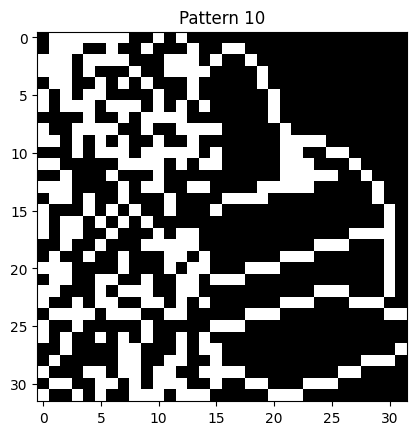

Converged
Iteration:  0


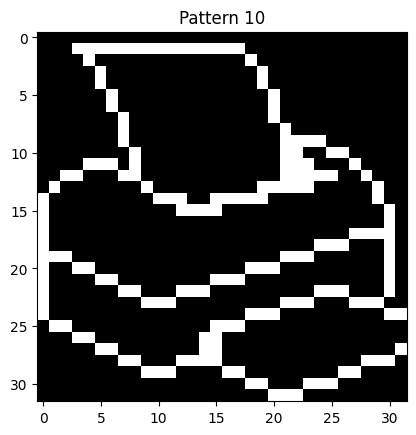

In [ ]:
p10 = probs[9*N:10*N]
p10 = p10.reshape(32,32).T
plt.imshow(p10, cmap='gray')
plt.title('Pattern 10')
plt.show()

p10 = p10.T

p10 = p10.reshape(1024,)
p10_prev = p10
for i in range(20):
  p10 = updating_units(W,p10_prev)
  if (p10 == p1).all():
    print("Converged")
    print("Iteration: ", i)
    break
  else:
    p10_prev = p10

p10 = p10.reshape(32,32).T
plt.imshow(p10, cmap='gray')
plt.title('Pattern 10')
plt.show()

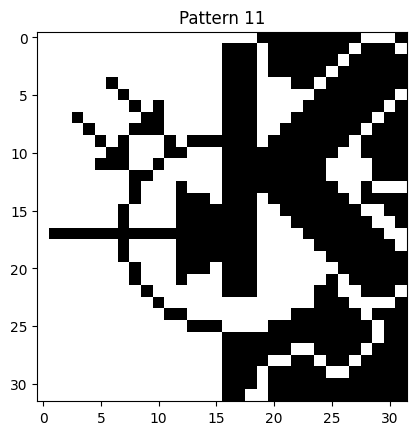

Converged to sth else
Iteration:  2


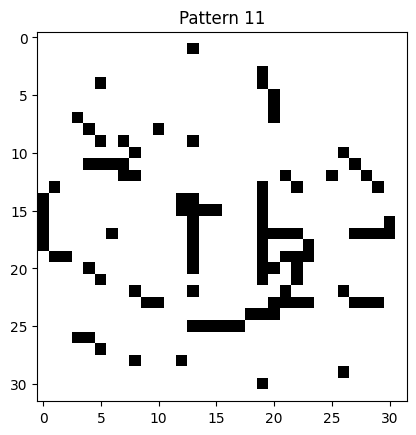

In [ ]:
p11 = probs[10*N:]
p11 = p11.reshape(32,32).T
plt.imshow(p11, cmap='gray')
plt.title('Pattern 11')
plt.show()

p11 = p11.T

p11 = p11.reshape(1024,)
p11_prev = p11
for i in range(20):
  p11 = updating_units(W,p11_prev)
  if (p11 == p2).all():
    print("Converged to p2")
    print("Iteration: ", i)
    break
  elif (p11 == p3).all():
    print("Converged to p3")
    print("Iteration: ", i)
    break
  elif(p11 == p11_prev).all():
    print('Converged to sth else')
    print("Iteration: ", i)
    break
  else:
    p11_prev = p11

p11 = p11.reshape(32,32).T
plt.imshow(p11, cmap='gray')
plt.title('Pattern 11')
plt.show()

What happens if we select units randomly? Implement the sequential Hopfield dynamics. Please demonstrate the image every hundredth iteration or so.

In [ ]:
def updating_units_seq(weights, input, index):
  output = np.sign(np.einsum('ij,i -> j', weights, input))
  input[index] = output[index]
  return input

In [ ]:
p10 = probs[9*N:10*N]
p11 = probs[10*N:]

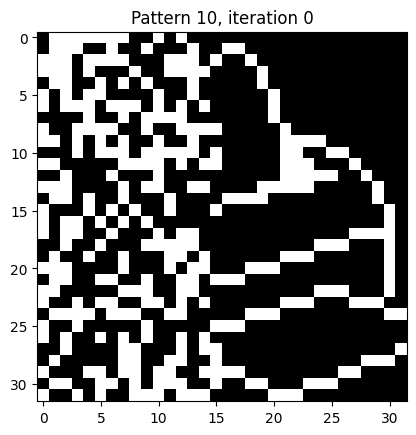

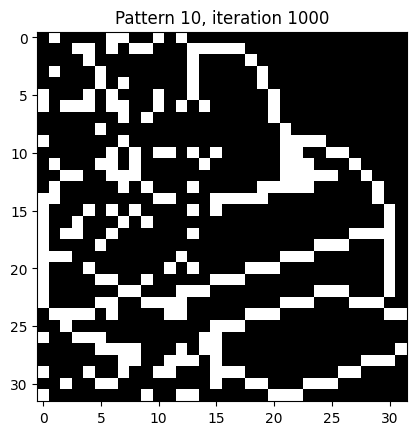

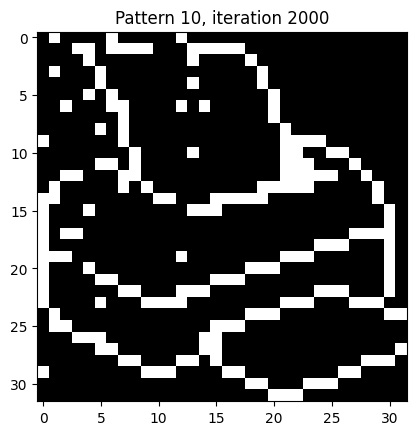

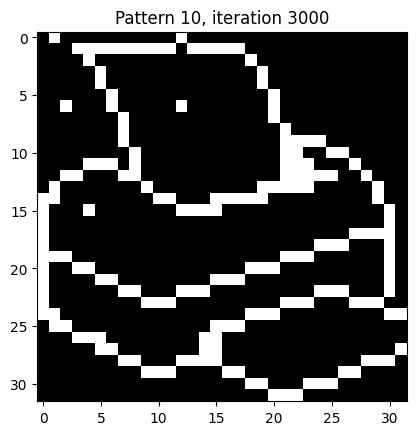

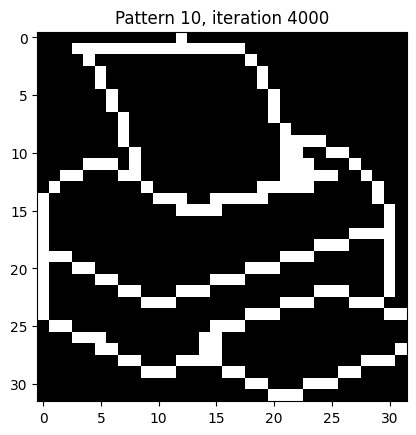

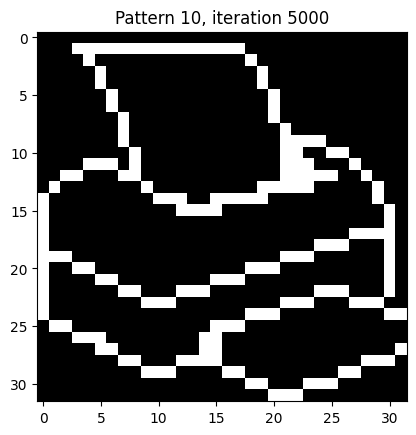

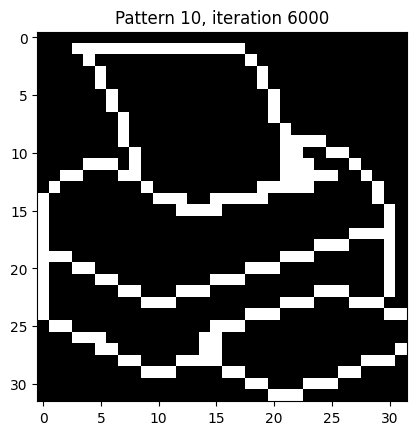

In [ ]:
# Works when we rerun the whole code
for i in range(7000):
  random_index = np.random.randint(0, 1024)

  p10 = updating_units_seq(W, p10, random_index)

  if i % 1000 == 0:
    p10_plot = p10.reshape(32,32).T
    plt.imshow(p10_plot, cmap='gray')
    plt.title(f'Pattern 10, iteration {i}')
    plt.show()


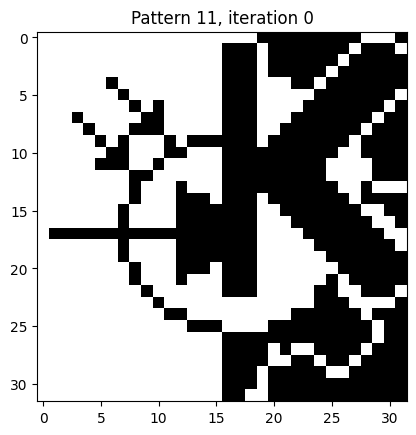

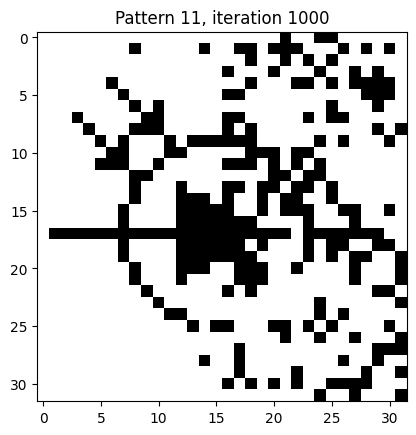

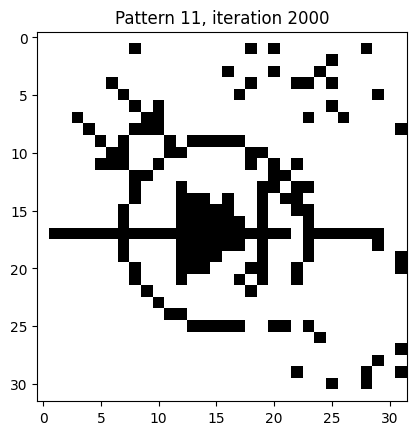

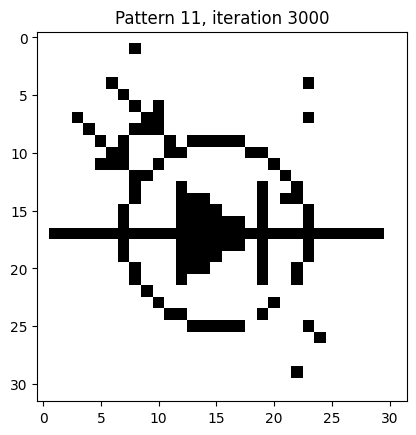

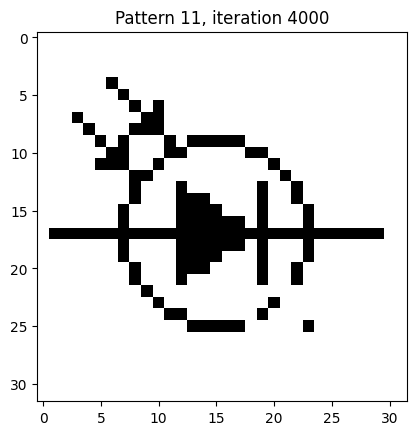

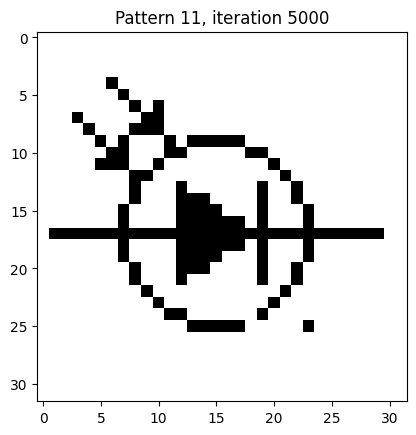

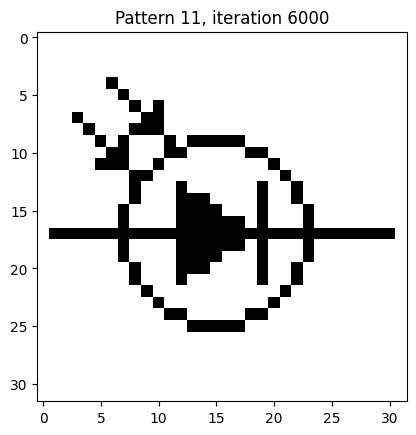

In [ ]:
for i in range(7000):
  random_index = np.random.randint(0, 1024)

  p11 = updating_units_seq(W, p11, random_index)

  if i % 1000 == 0:
    #energy = energy_calculation(W, p11)
    #print(energy)
    p11_plot = p11.reshape(32,32).T
    plt.imshow(p11_plot, cmap='gray')
    plt.title(f'Pattern 11, iteration {i}')
    plt.show()

## 3.3 Energy

In [ ]:
def energy_calculation(weights, input):
  energy = - np.einsum('ij,i,j', weights, input, input)
  return energy

What is the energy at the different attractors?

In [ ]:
for i in range(9):
  pattern = probs[i*N:(i+1)*N]
  energy = energy_calculation(W, pattern)
  print(energy)

-1439.390625
-1365.640625
-1462.25
-720.48046875
-525.890625
-683.296875
-685.73046875
-171.546875
-267.51171875


In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/DD2437_Lab3_data/pict.dat'

probs = np.loadtxt(file_path, delimiter=',')

N = 1024
p1 = probs[:N]
p2 = probs[N:2*N]
p3 = probs[2*N:3*N]
p4 = probs[3*N:4*N]
p5 = probs[4*N:5*N]
p6 = probs[5*N:6*N]
p7 = probs[6*N:7*N]
p8 = probs[7*N:8*N]
p9 = probs[8*N:9*N]
p10 = probs[9*N:10*N]
p11 = probs[10*N:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 What is the energy at the points of the distorted patterns?

In [ ]:
# p10 = probs[9*N:10*N]
# p11 = probs[10*N:]

energy = energy_calculation(W, probs[9*N:10*N])
print("P10 energy: ", energy)
energy = energy_calculation(W, probs[10*N:])
print("P11 energy: ", energy)


P10 energy:  -415.98046875
P11 energy:  -173.5


 Follow how the energy changes from iteration to iteration when you use
the sequential update rule to approach an attractor.

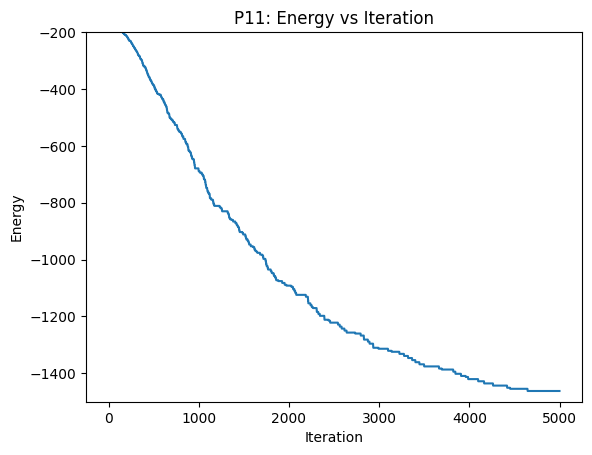

In [ ]:
energy_list = []

for i in range(5000):
  random_index = np.random.randint(0, 1024)

  p11 = updating_units_seq(W, p11, random_index)

  energy = energy_calculation(W, p11)
  energy_list.append(energy)


plt.plot(energy_list)
plt.ylim(-1500, -200)
plt.title('P11: Energy vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.show()

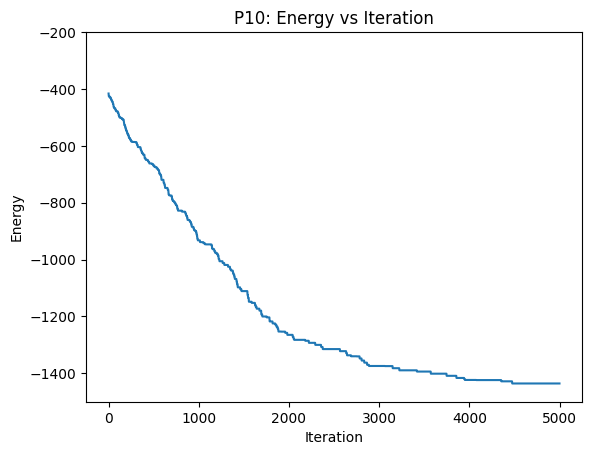

In [ ]:
energy_list = []

for i in range(5000):
  random_index = np.random.randint(0, 1024)

  p10 = updating_units_seq(W, p10, random_index)

  energy = energy_calculation(W, p10)
  energy_list.append(energy)


plt.plot(energy_list)
plt.title('P10: Energy vs Iteration')
plt.ylim(-1500, -200)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.show()

 Generate a weight matrix by setting the weights to normally distributed
random numbers, and try iterating an arbitrary starting state. What
happens?

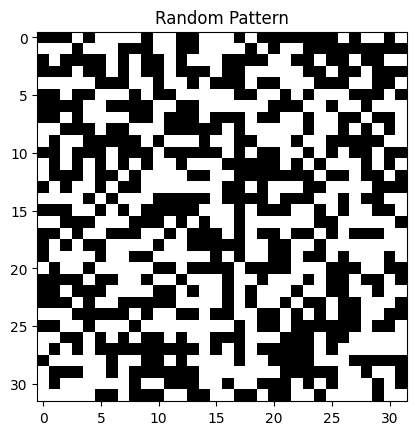

Text(0, 0.5, 'Energy')

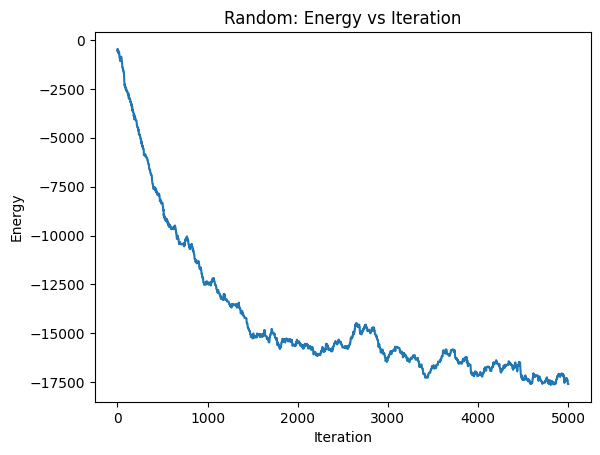

In [ ]:
random_weights = np.random.normal(0, 1, (N, N))
random_pattern = np.random.choice([-1, 1], size=N)


energy_list = []

for i in range(5000):
  random_index = np.random.randint(0, 1024)

  random_pattern = updating_units_seq(random_weights, random_pattern, random_index)

  energy = energy_calculation(random_weights, random_pattern)
  energy_list.append(energy)

random_pattern_plot = random_pattern.reshape(32,32).T
plt.imshow(random_pattern_plot, cmap='gray')
plt.title('Random Pattern')
plt.show()

plt.plot(energy_list)
plt.title('Random: Energy vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Energy')

Make the weight matrix symmetric (e.g. by setting w=0.5*(w+w')). What
happens now? Why?


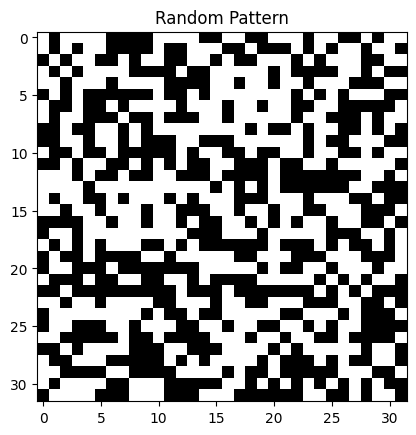

Text(0, 0.5, 'Energy')

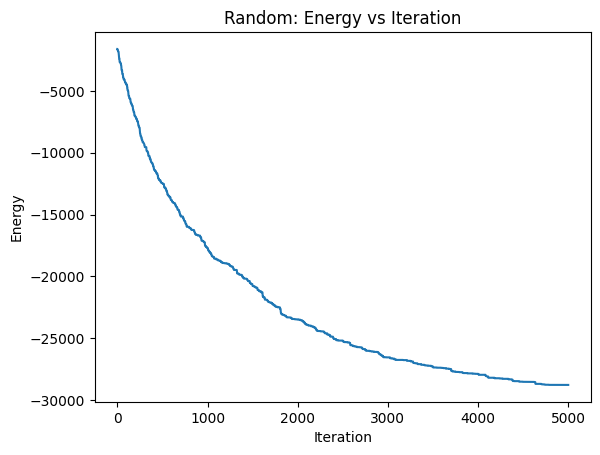

In [ ]:
random_weights = np.random.normal(0, 1, (N, N))
symetric_weights = (random_weights + random_weights.T) / 2
random_pattern = np.random.choice([-1, 1], size=N)

energy_list = []
for i in range(5000):
  random_index = np.random.randint(0, 1024)

  random_pattern = updating_units_seq(symetric_weights, random_pattern, random_index)

  energy = energy_calculation(symetric_weights, random_pattern)
  energy_list.append(energy)


random_pattern_plot = random_pattern.reshape(32,32).T
plt.imshow(random_pattern_plot, cmap='gray')
plt.title('Random Pattern')
plt.show()

plt.plot(energy_list)
plt.title('Random: Energy vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Energy')

# symmetric weight matrix makes error landscape instable -> min can't be found

## 3.4 Distortion Resistance

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/DD2437_Lab3_data/pict.dat'

probs = np.loadtxt(file_path, delimiter=',')

N = 1024
p1 = probs[:N]
p2 = probs[N:2*N]
p3 = probs[2*N:3*N]
p4 = probs[3*N:4*N]
p5 = probs[4*N:5*N]
p6 = probs[5*N:6*N]
p7 = probs[6*N:7*N]
p8 = probs[7*N:8*N]
p9 = probs[8*N:9*N]
p10 = probs[9*N:10*N]
p11 = probs[10*N:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
p = np.vstack((p1, p2, p3))
W  = learning_weights(p, N)

How much noise can be removed?
Is there any difference between the three attractors with regard to noise tolerance?
Does the network always converge to the right attractor? Do the extra iterations (beyond a single-step recall) help? Do you notice any other attractors?

Percentage of flipped units:  0


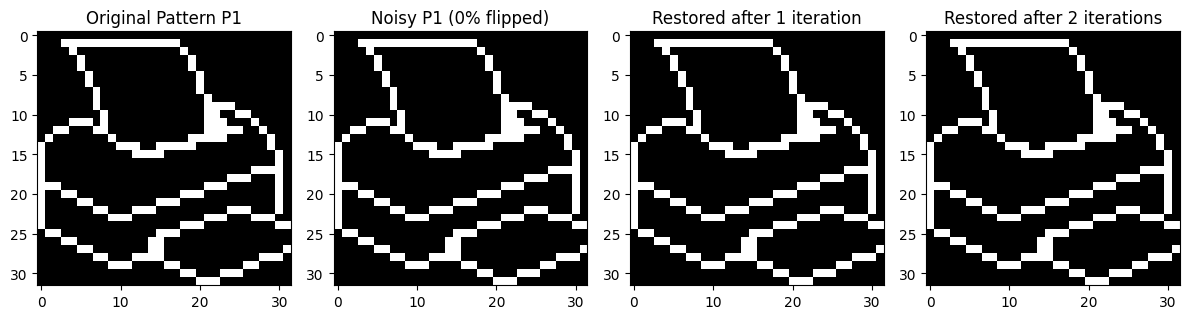

P1 after 1 iteration: 1.0
P1 after 2 iterations: 1.0
Percentage of flipped units:  10


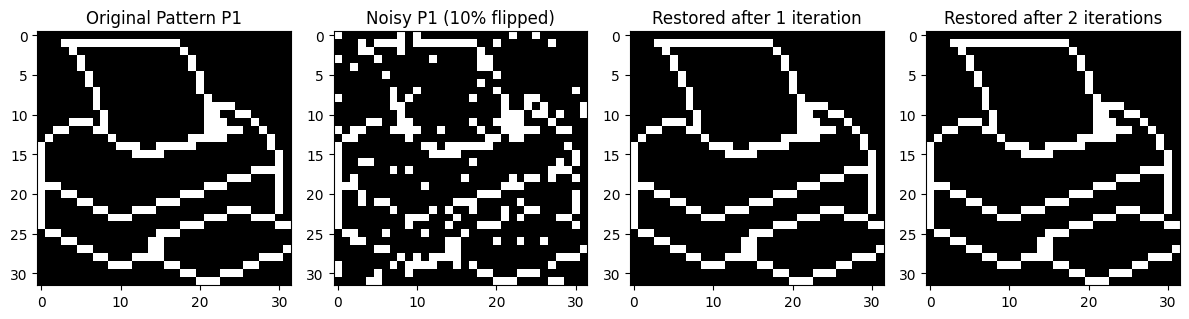

P1 after 1 iteration: 1.0
P1 after 2 iterations: 1.0
Percentage of flipped units:  20


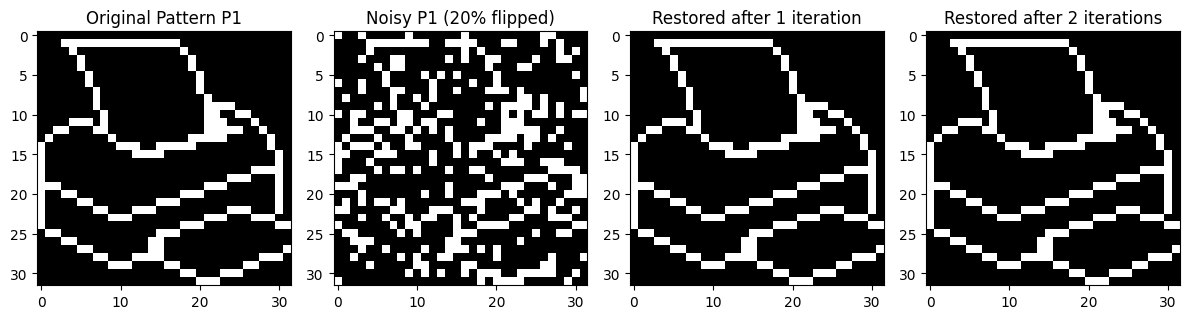

P1 after 1 iteration: 1.0
P1 after 2 iterations: 1.0
Percentage of flipped units:  30


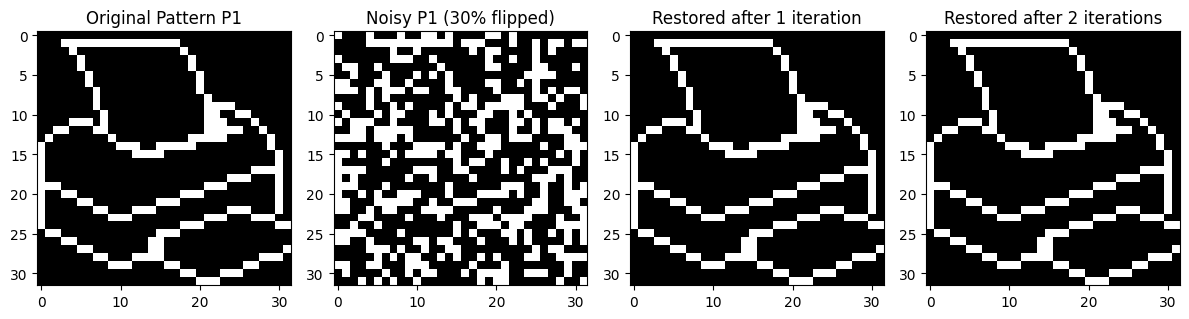

P1 after 1 iteration: 1.0
P1 after 2 iterations: 1.0
Percentage of flipped units:  40


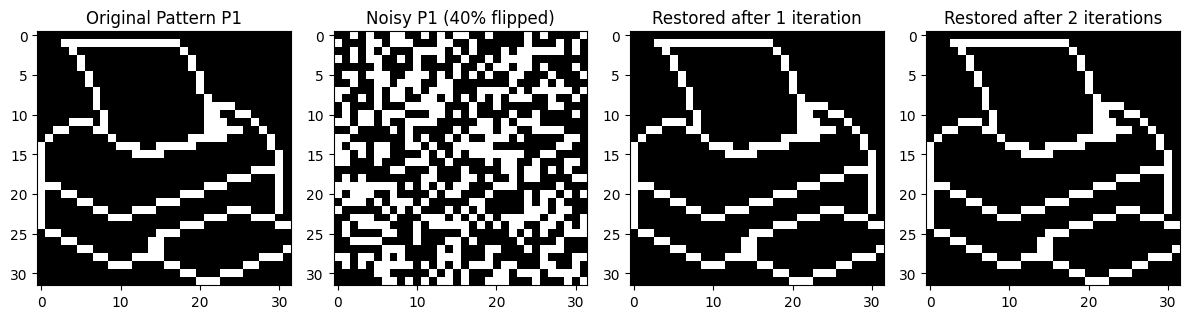

P1 after 1 iteration: 1.0
P1 after 2 iterations: 1.0
Percentage of flipped units:  50


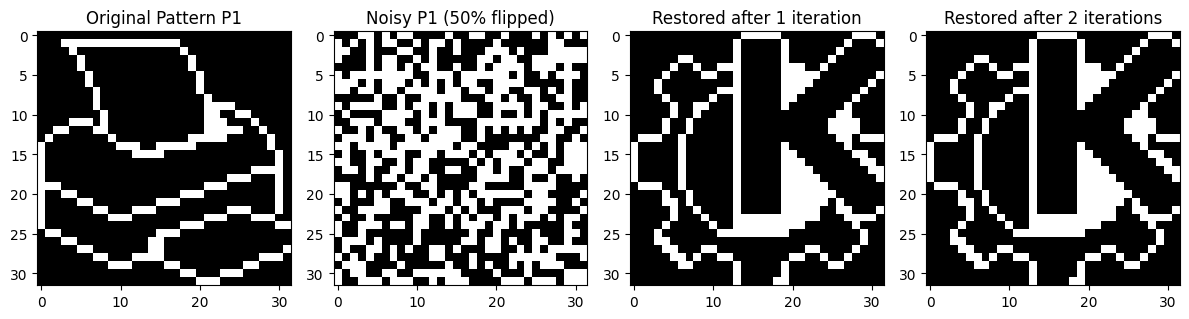

P1 after 1 iteration: 0.697265625
P1 after 2 iterations: 0.697265625
Percentage of flipped units:  60


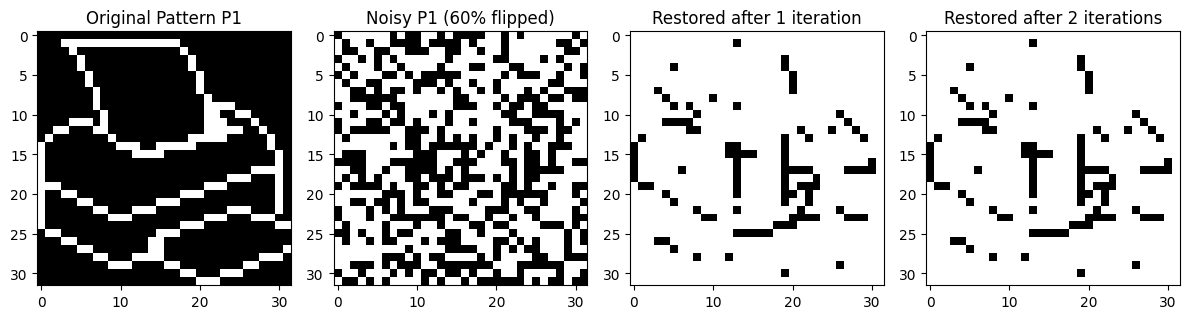

P1 after 1 iteration: 0.1318359375
P1 after 2 iterations: 0.1318359375
Percentage of flipped units:  70


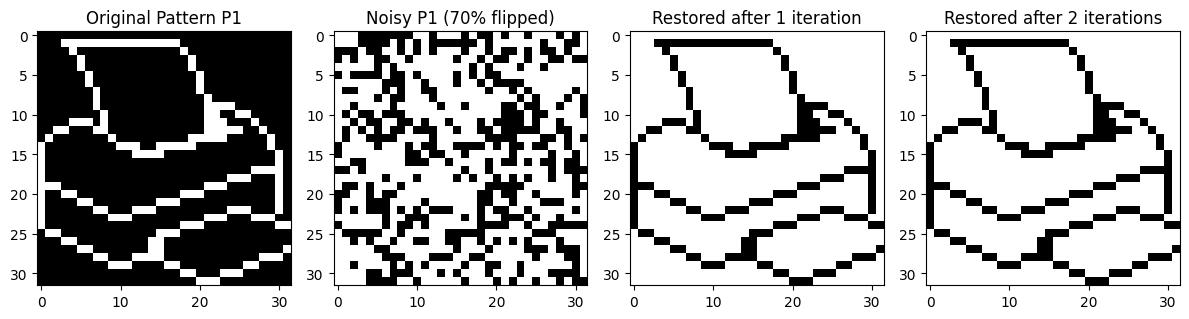

P1 after 1 iteration: 0.0
P1 after 2 iterations: 0.0
Percentage of flipped units:  80


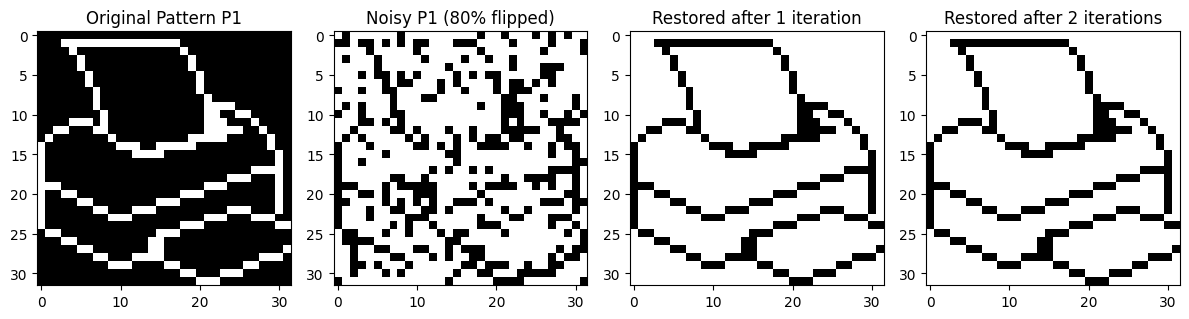

P1 after 1 iteration: 0.0
P1 after 2 iterations: 0.0
Percentage of flipped units:  90


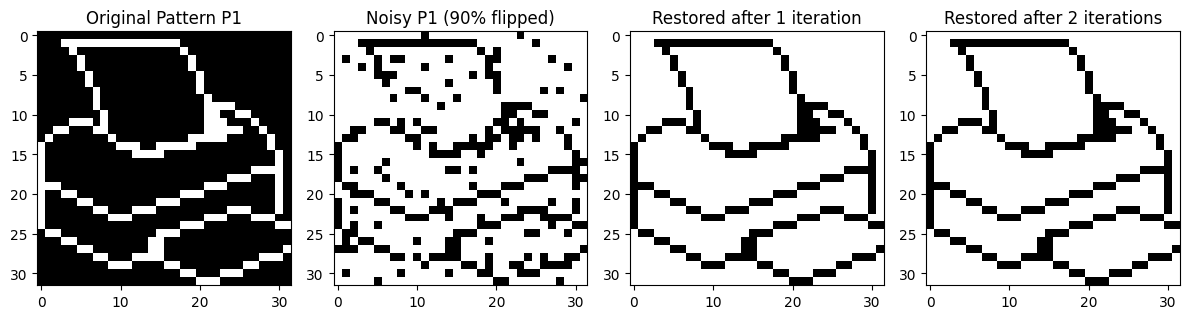

P1 after 1 iteration: 0.0
P1 after 2 iterations: 0.0


In [ ]:
import random

for percent in range(0, 99, 10):
    print("Percentage of flipped units: ", percent)

    # Flipping random indices
    num_flips = int(percent * N / 100)
    random_indices = random.sample(range(N), num_flips)
    p1_noisy = p1.copy()
    for i in random_indices:
        p1_noisy[i] *= -1

    # Trying to restore the pattern
    restored_p1_after_1 = updating_units(W, p1_noisy)
    restored_p1_after_2 = updating_units(W, restored_p1_after_1)

    # Plots
    fig, axes = plt.subplots(1, 4, figsize=(12, 6))

    axes[0].imshow(p1.reshape(32, 32).T, cmap='gray')
    axes[0].set_title(f'Original Pattern P1')

    axes[1].imshow(p1_noisy.reshape(32, 32).T, cmap='gray')
    axes[1].set_title(f'Noisy P1 ({percent}% flipped)')

    axes[2].imshow(restored_p1_after_1.reshape(32, 32).T, cmap='gray')
    axes[2].set_title('Restored after 1 iteration')

    axes[3].imshow(restored_p1_after_2.reshape(32, 32).T, cmap='gray')
    axes[3].set_title('Restored after 2 iterations')

    plt.tight_layout()
    plt.show()

    counter_p1_after_1 = sum(1 for x, y in zip(restored_p1_after_1, p1) if x == y)
    counter_p1_after_2 = sum(1 for x, y in zip(restored_p1_after_2, p1) if x == y)

    print(f"P1 after 1 iteration: {counter_p1_after_1 / N}")
    print(f"P1 after 2 iterations: {counter_p1_after_2 / N}")

Percentage of flipped units:  0


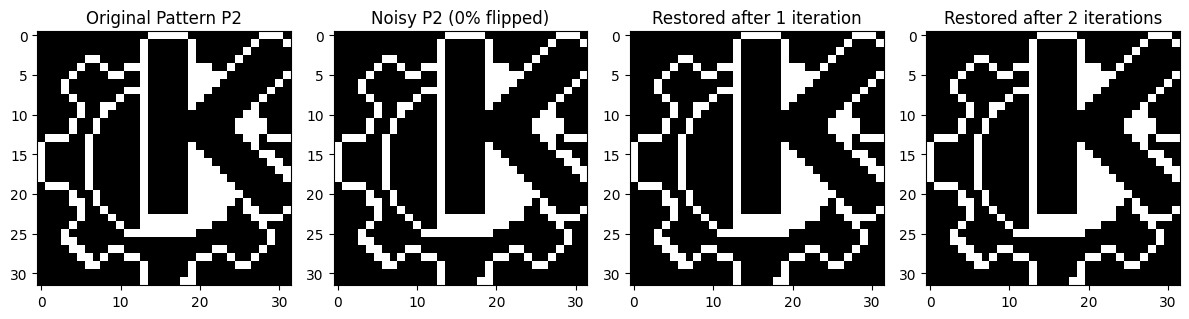

P2 after 1 iteration: 1.0
P2 after 2 iterations: 1.0
Percentage of flipped units:  10


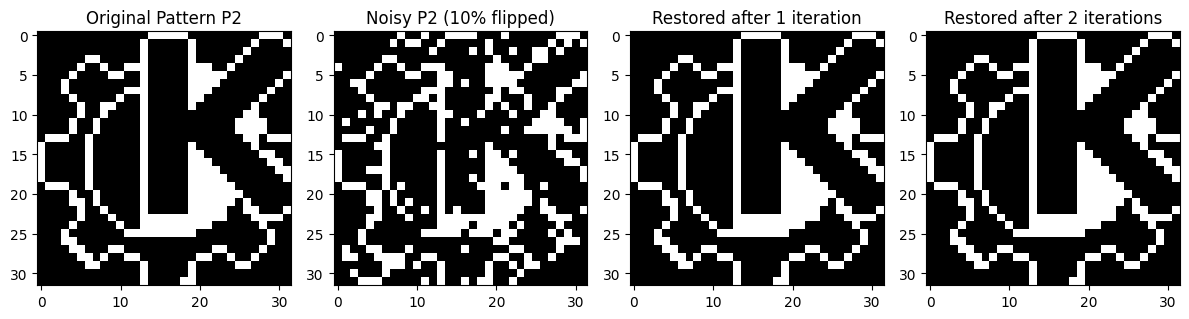

P2 after 1 iteration: 1.0
P2 after 2 iterations: 1.0
Percentage of flipped units:  20


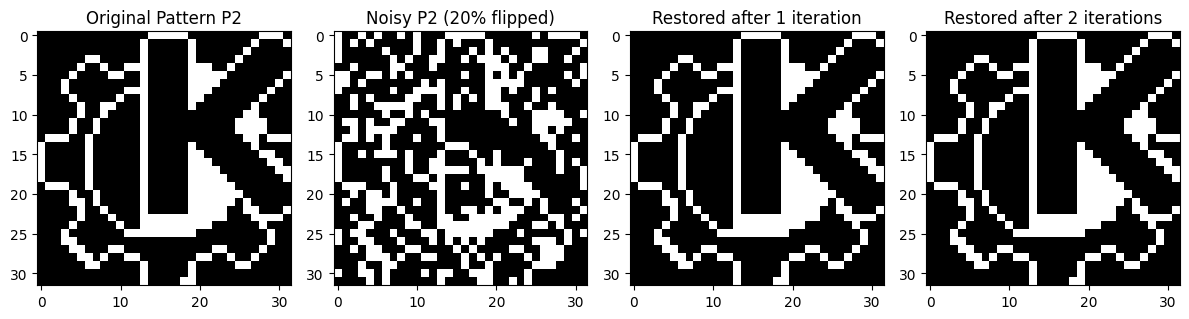

P2 after 1 iteration: 1.0
P2 after 2 iterations: 1.0
Percentage of flipped units:  30


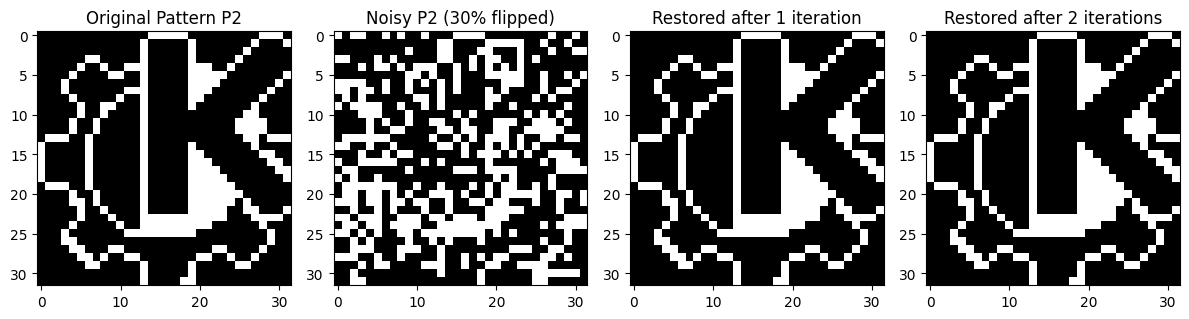

P2 after 1 iteration: 1.0
P2 after 2 iterations: 1.0
Percentage of flipped units:  40


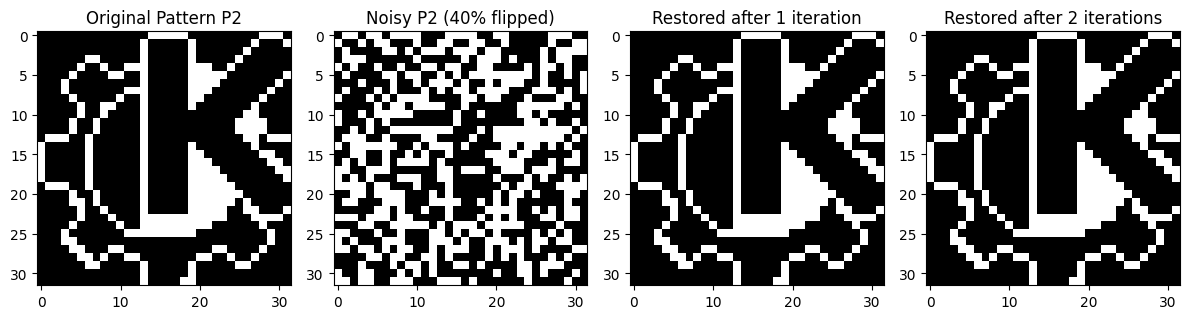

P2 after 1 iteration: 1.0
P2 after 2 iterations: 1.0
Percentage of flipped units:  50


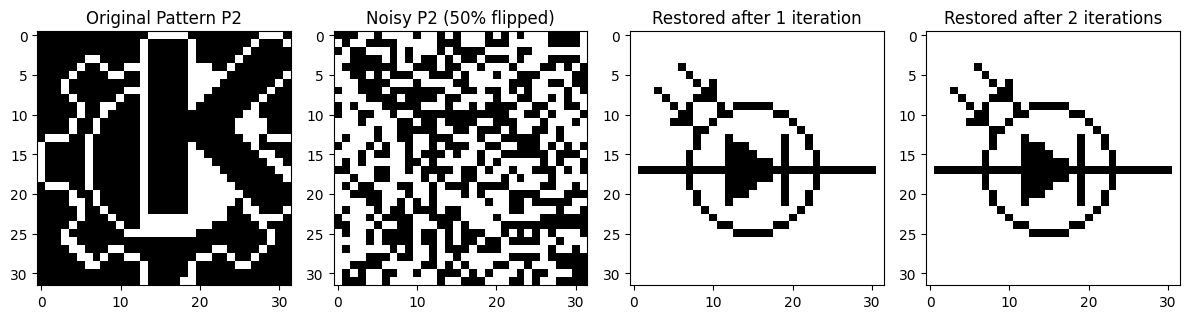

P2 after 1 iteration: 0.2890625
P2 after 2 iterations: 0.2890625
Percentage of flipped units:  60


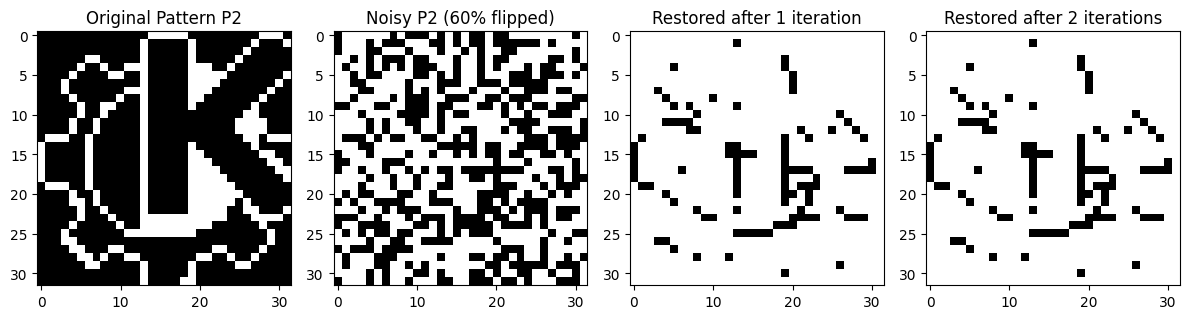

P2 after 1 iteration: 0.1708984375
P2 after 2 iterations: 0.1708984375
Percentage of flipped units:  70


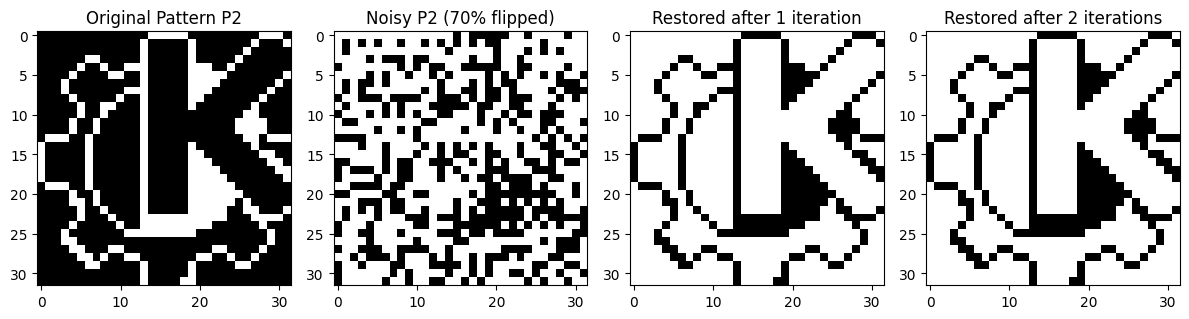

P2 after 1 iteration: 0.0
P2 after 2 iterations: 0.0
Percentage of flipped units:  80


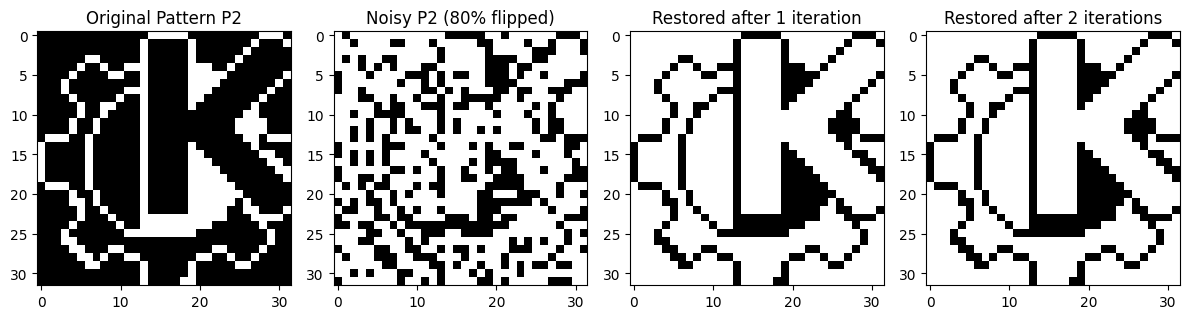

P2 after 1 iteration: 0.0
P2 after 2 iterations: 0.0
Percentage of flipped units:  90


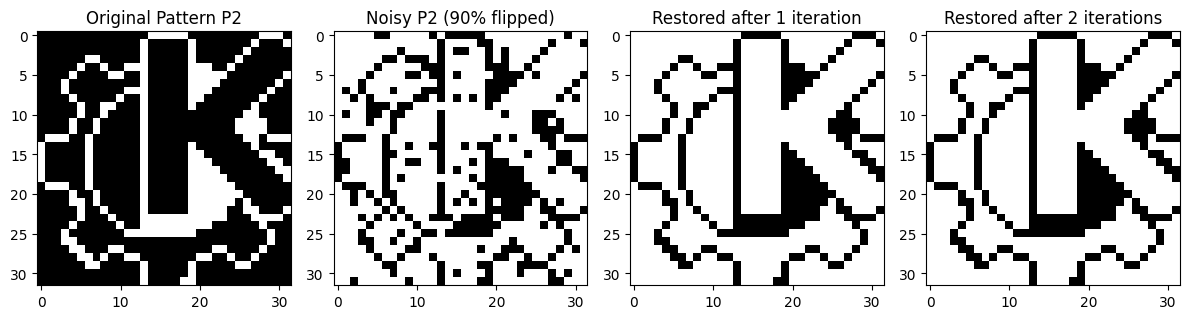

P2 after 1 iteration: 0.0
P2 after 2 iterations: 0.0


In [ ]:
for percent in range(0, 99, 10):
    print("Percentage of flipped units: ", percent)

    # Flipping random indices
    num_flips = int(percent * N / 100)
    random_indices = random.sample(range(N), num_flips)
    p2_noisy = p2.copy()
    for i in random_indices:
        p2_noisy[i] *= -1

    # Trying to restore the pattern
    restored_p2_after_1 = updating_units(W, p2_noisy)
    restored_p2_after_2 = updating_units(W, restored_p2_after_1)

    # Plots
    fig, axes = plt.subplots(1, 4, figsize=(12, 6))

    axes[0].imshow(p2.reshape(32, 32).T, cmap='gray')
    axes[0].set_title(f'Original Pattern P2')

    axes[1].imshow(p2_noisy.reshape(32, 32).T, cmap='gray')
    axes[1].set_title(f'Noisy P2 ({percent}% flipped)')

    axes[2].imshow(restored_p2_after_1.reshape(32, 32).T, cmap='gray')
    axes[2].set_title('Restored after 1 iteration')

    axes[3].imshow(restored_p2_after_2.reshape(32, 32).T, cmap='gray')
    axes[3].set_title('Restored after 2 iterations')

    plt.tight_layout()
    plt.show()

    counter_p2_after_1 = sum(1 for x, y in zip(restored_p2_after_1, p2) if x == y)
    counter_p2_after_2 = sum(1 for x, y in zip(restored_p2_after_2, p2) if x == y)

    print(f"P2 after 1 iteration: {counter_p2_after_1 / N}")
    print(f"P2 after 2 iterations: {counter_p2_after_2 / N}")

Percentage of flipped units:  0


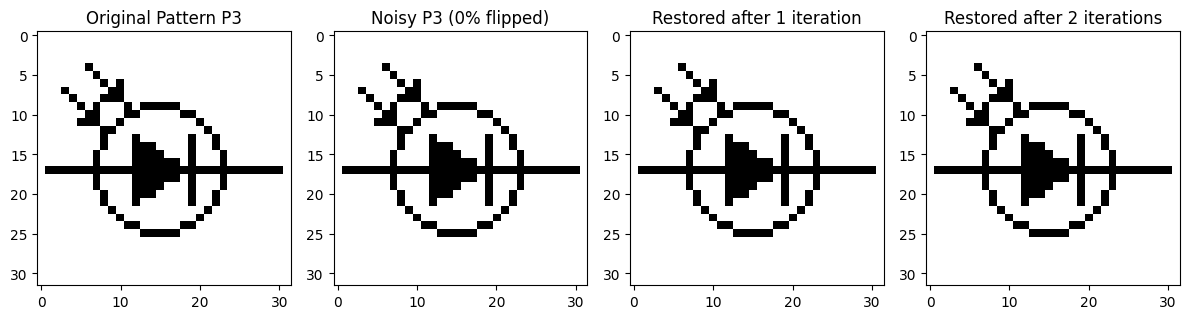

P3 after 1 iteration: 1.0
P3 after 2 iterations: 1.0
Percentage of flipped units:  10


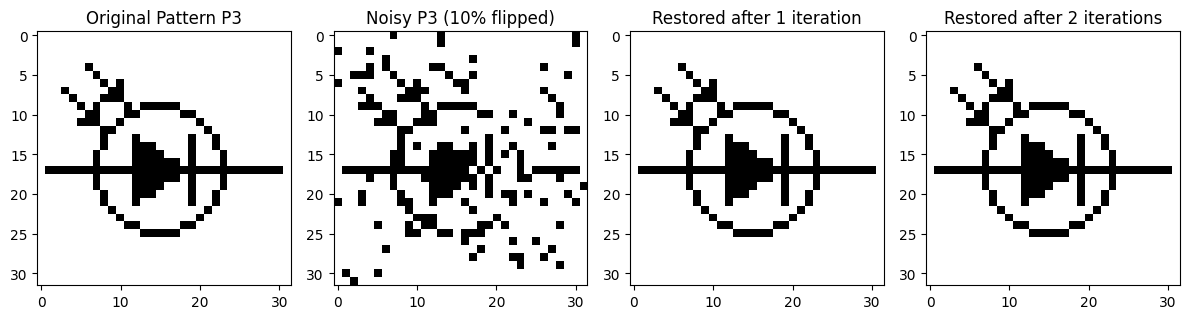

P3 after 1 iteration: 1.0
P3 after 2 iterations: 1.0
Percentage of flipped units:  20


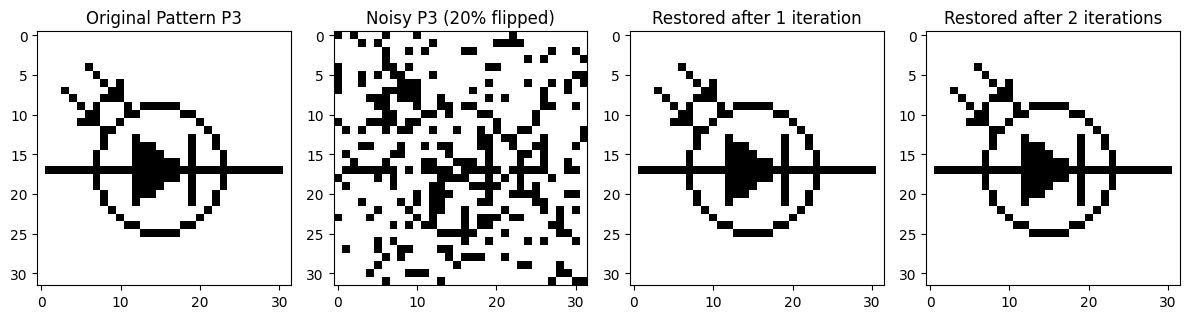

P3 after 1 iteration: 1.0
P3 after 2 iterations: 1.0
Percentage of flipped units:  30


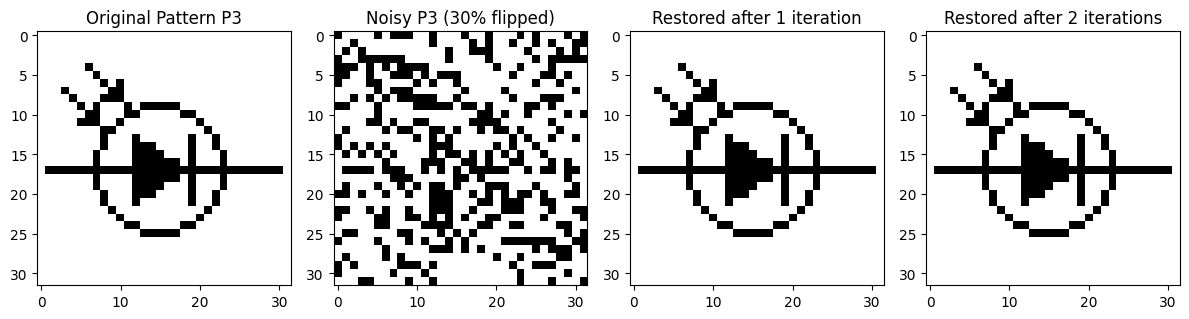

P3 after 1 iteration: 1.0
P3 after 2 iterations: 1.0
Percentage of flipped units:  40


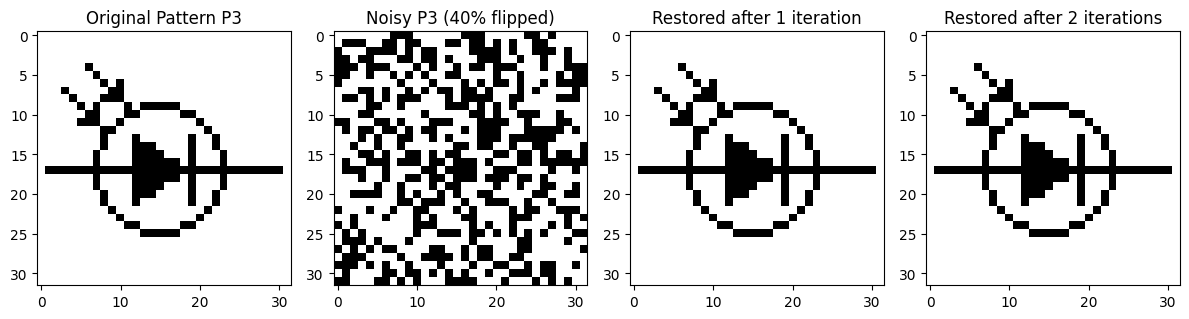

P3 after 1 iteration: 1.0
P3 after 2 iterations: 1.0
Percentage of flipped units:  50


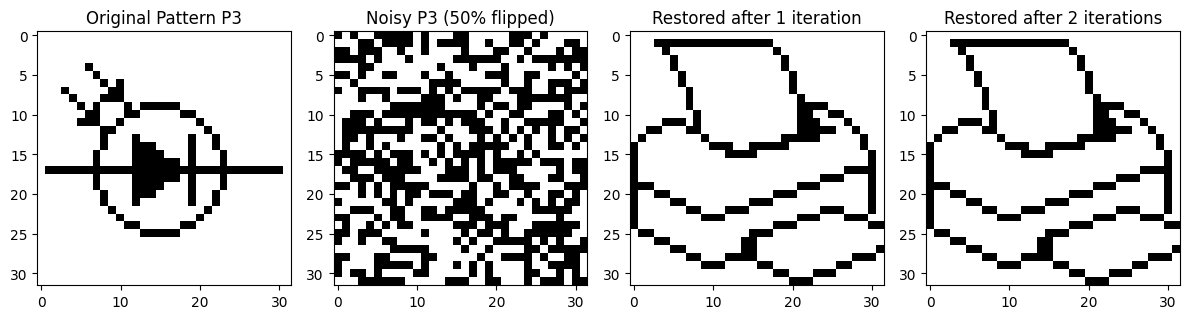

P3 after 1 iteration: 0.75
P3 after 2 iterations: 0.75
Percentage of flipped units:  60


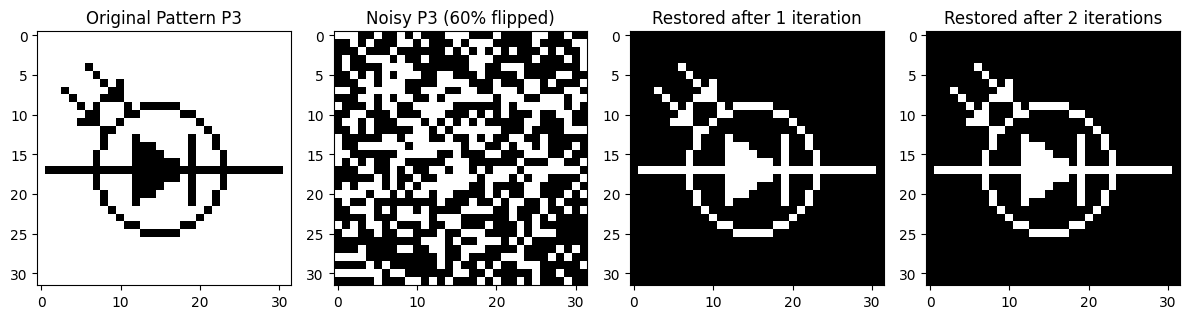

P3 after 1 iteration: 0.0
P3 after 2 iterations: 0.0
Percentage of flipped units:  70


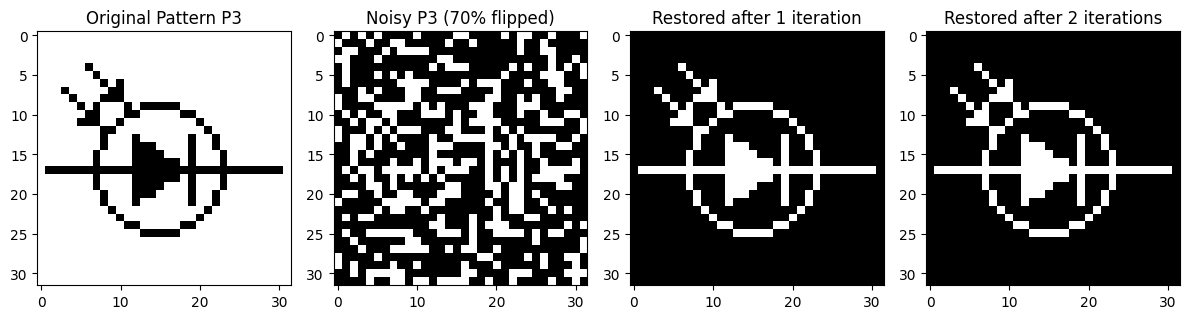

P3 after 1 iteration: 0.0
P3 after 2 iterations: 0.0
Percentage of flipped units:  80


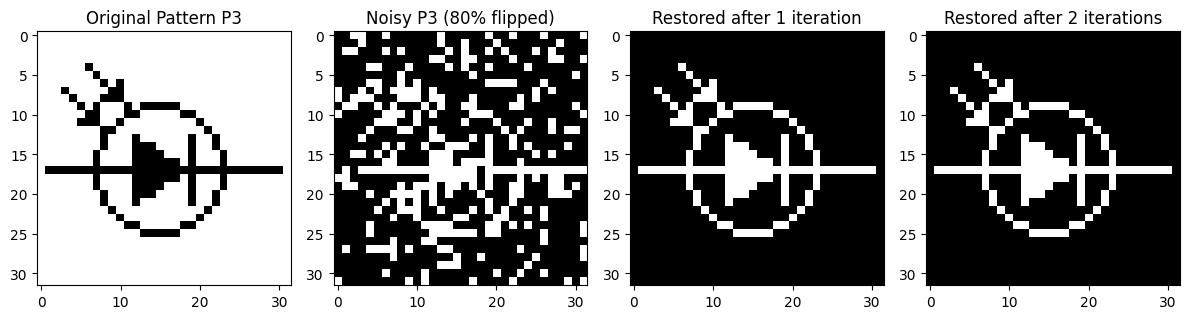

P3 after 1 iteration: 0.0
P3 after 2 iterations: 0.0
Percentage of flipped units:  90


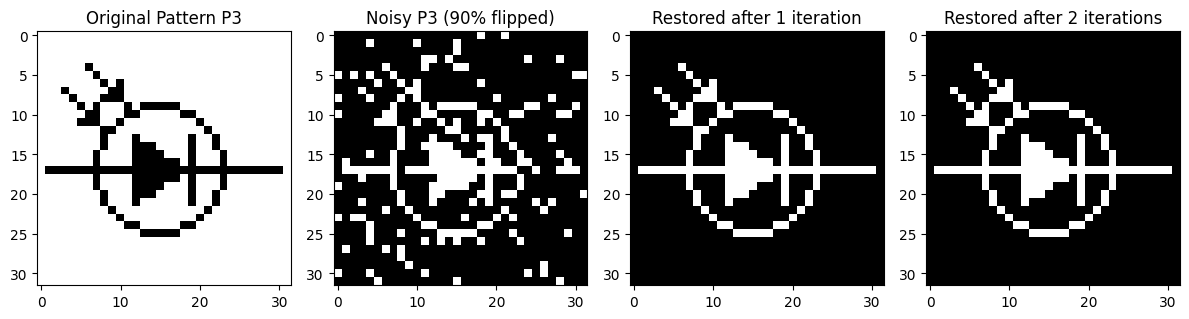

P3 after 1 iteration: 0.0
P3 after 2 iterations: 0.0


In [ ]:
for percent in range(0, 99, 10):
    print("Percentage of flipped units: ", percent)

    # Flipping random indices
    num_flips = int(percent * N / 100)
    random_indices = random.sample(range(N), num_flips)
    p3_noisy = p3.copy()
    for i in random_indices:
        p3_noisy[i] *= -1

    # Trying to restore the pattern
    restored_p3_after_1 = updating_units(W, p3_noisy)
    restored_p3_after_2 = updating_units(W, restored_p3_after_1)

    # Plots
    fig, axes = plt.subplots(1, 4, figsize=(12, 6))

    axes[0].imshow(p3.reshape(32, 32).T, cmap='gray')
    axes[0].set_title(f'Original Pattern P3')

    axes[1].imshow(p3_noisy.reshape(32, 32).T, cmap='gray')
    axes[1].set_title(f'Noisy P3 ({percent}% flipped)')

    axes[2].imshow(restored_p3_after_1.reshape(32, 32).T, cmap='gray')
    axes[2].set_title('Restored after 1 iteration')

    axes[3].imshow(restored_p3_after_2.reshape(32, 32).T, cmap='gray')
    axes[3].set_title('Restored after 2 iterations')

    plt.tight_layout()
    plt.show()

    counter_p3_after_1 = sum(1 for x, y in zip(restored_p3_after_1, p3) if x == y)
    counter_p3_after_2 = sum(1 for x, y in zip(restored_p3_after_2, p3) if x == y)

    print(f"P3 after 1 iteration: {counter_p3_after_1 / N}")
    print(f"P3 after 2 iterations: {counter_p3_after_2 / N}")

## 3.5 Capacity

 How many patterns could safely be stored? Was the drop in performance
gradual or abrupt?


In [ ]:
# Adding p4
# List of patterns and their labels
patterns = [p1, p2, p3, p4]
pattern_names = ['P1', 'P2', 'P3', 'P4']

W  = learning_weights(patterns, N)


Processing P1 with 1% distortion


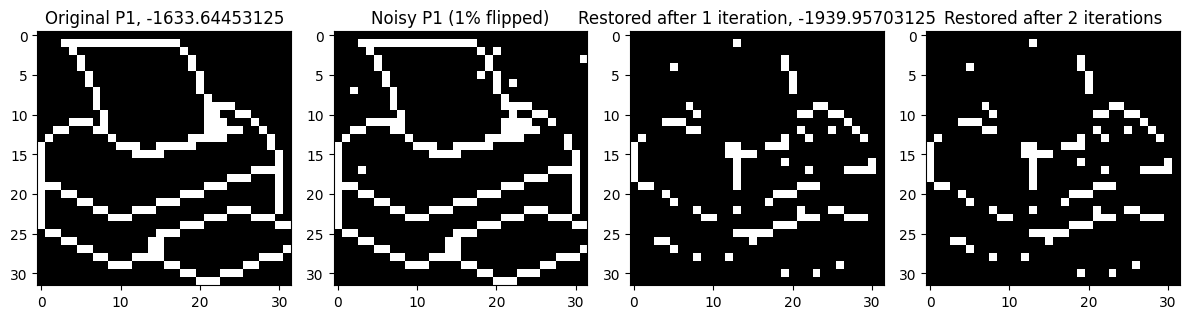

P1 after 1 iteration: 0.8984375
P1 after 2 iterations: 0.8984375
Processing P2 with 1% distortion


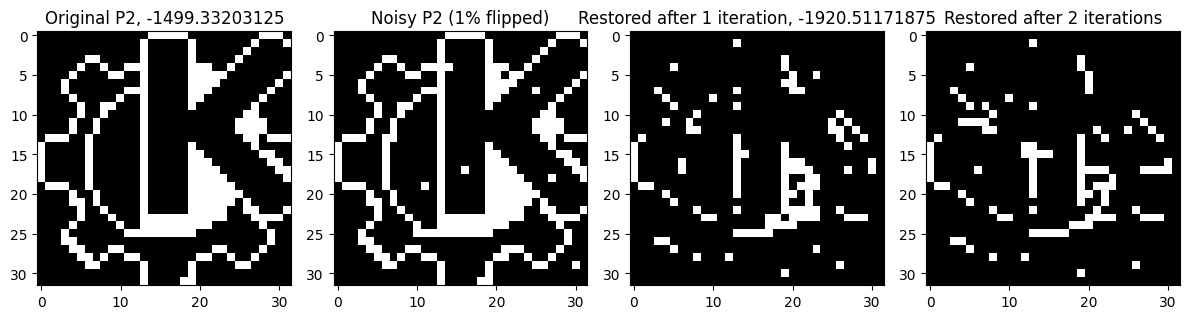

P2 after 1 iteration: 0.8603515625
P2 after 2 iterations: 0.8291015625
Processing P3 with 1% distortion


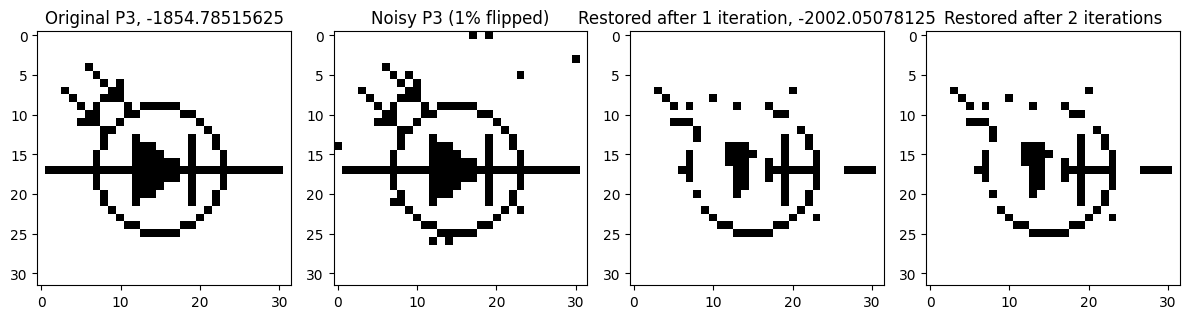

P3 after 1 iteration: 0.951171875
P3 after 2 iterations: 0.951171875
Processing P4 with 1% distortion


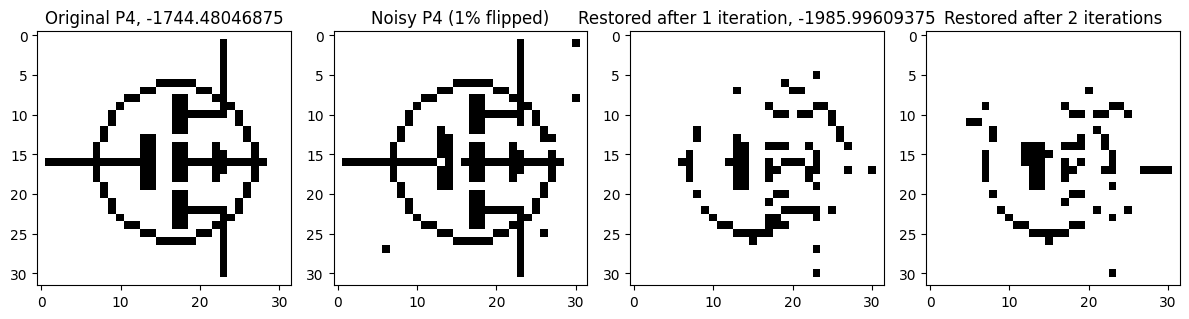

P4 after 1 iteration: 0.919921875
P4 after 2 iterations: 0.888671875


In [35]:
# Set percent distortion
percent = 1
num_flips = int(percent * N / 100)

# Loop through each pattern
for idx, pattern in enumerate(patterns):
    print(f"Processing {pattern_names[idx]} with {percent}% distortion")

    # Flipping random indices
    random_indices = random.sample(range(N), num_flips)
    noisy_pattern = pattern.copy()

    # Apply random flips
    for i in random_indices:
        noisy_pattern[i] *= -1

    # Restore the pattern after 1 and 2 iterations
    restored_after_1 = updating_units(W, noisy_pattern)
    restored_after_2 = updating_units(W, restored_after_1)

    # Plots
    fig, axes = plt.subplots(1, 4, figsize=(12, 6))

    axes[0].imshow(pattern.reshape(32, 32).T, cmap='gray')
    axes[0].set_title(f'Original {pattern_names[idx]}')

    axes[1].imshow(noisy_pattern.reshape(32, 32).T, cmap='gray')
    axes[1].set_title(f'Noisy {pattern_names[idx]} ({percent}% flipped)')

    axes[2].imshow(restored_after_1.reshape(32, 32).T, cmap='gray')
    axes[2].set_title('Restored after 1 iteration')

    axes[3].imshow(restored_after_2.reshape(32, 32).T, cmap='gray')
    axes[3].set_title('Restored after 2 iterations')

    plt.tight_layout()
    plt.show()

    # Counting how many units match the original after restoration
    counter_after_1 = sum(1 for x, y in zip(restored_after_1, pattern) if x == y)
    counter_after_2 = sum(1 for x, y in zip(restored_after_2, pattern) if x == y)

    print(f"{pattern_names[idx]} after 1 iteration: {counter_after_1 / N}")
    print(f"{pattern_names[idx]} after 2 iterations: {counter_after_2 / N}")

    # 1024*0.138 only for random patterns (uncorrelated)

In [ ]:
# Adding p5, p6 and p7
# List of patterns and their labels
patterns = [p1, p2, p3, p4, p5, p6, p7]
pattern_names = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']

W  = learning_weights(patterns, N)

Processing P1 with 1% distortion


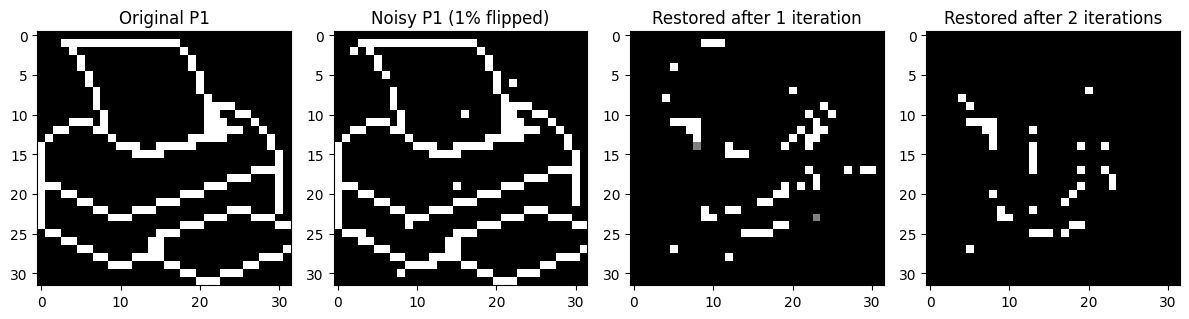

P1 after 1 iteration: 0.8603515625
P1 after 2 iterations: 0.8271484375
Processing P2 with 1% distortion


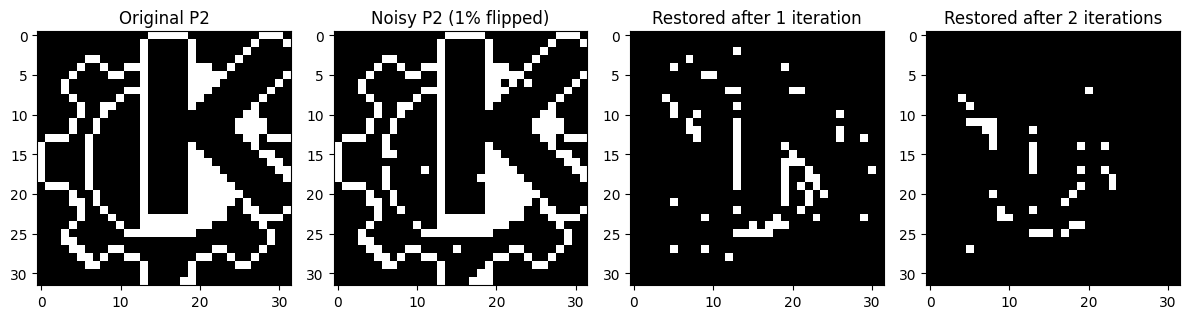

P2 after 1 iteration: 0.82421875
P2 after 2 iterations: 0.7724609375
Processing P3 with 1% distortion


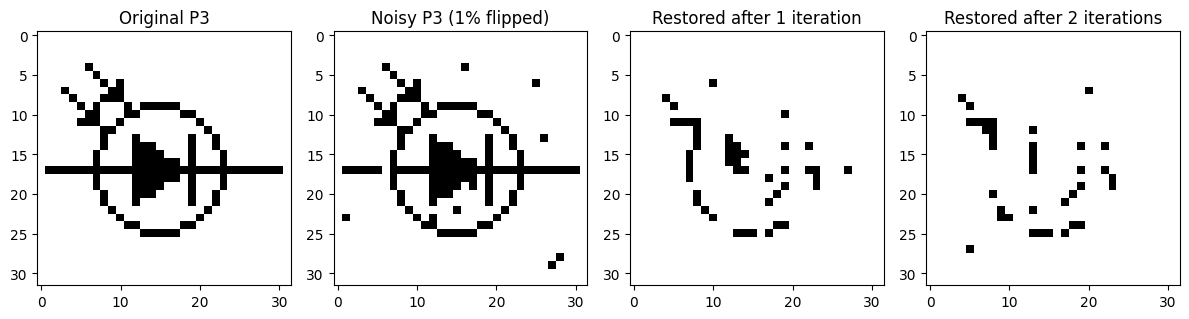

P3 after 1 iteration: 0.9150390625
P3 after 2 iterations: 0.8935546875
Processing P4 with 1% distortion


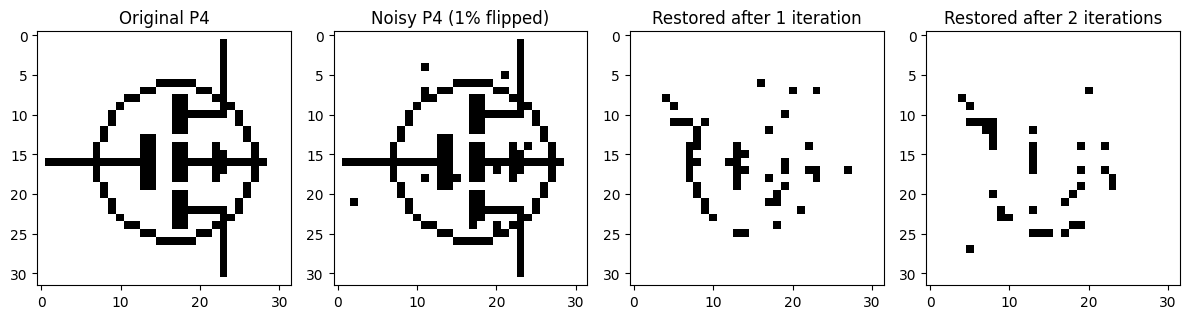

P4 after 1 iteration: 0.8837890625
P4 after 2 iterations: 0.849609375
Processing P5 with 1% distortion


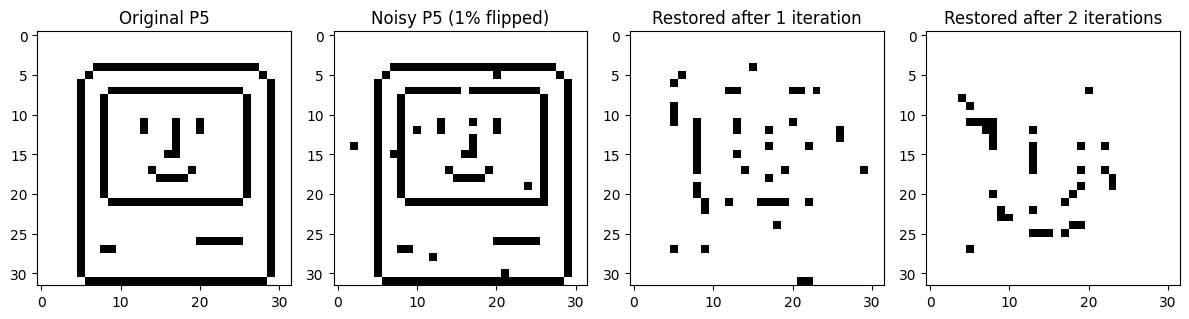

P5 after 1 iteration: 0.861328125
P5 after 2 iterations: 0.8115234375
Processing P6 with 1% distortion


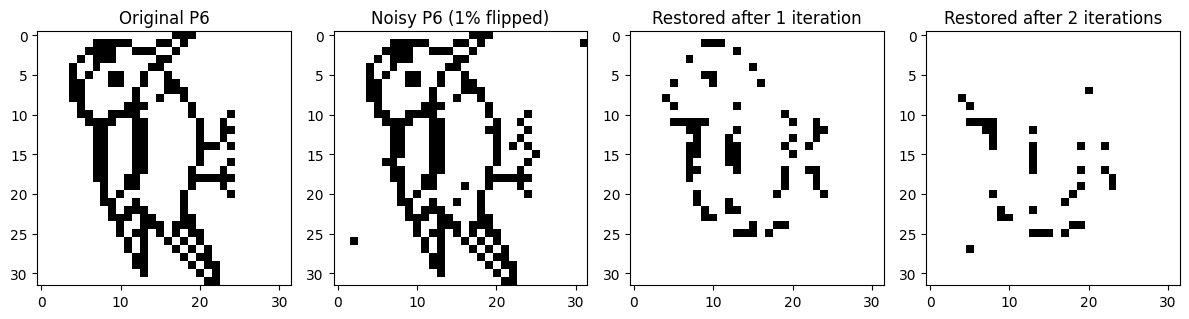

P6 after 1 iteration: 0.8818359375
P6 after 2 iterations: 0.8408203125
Processing P7 with 1% distortion


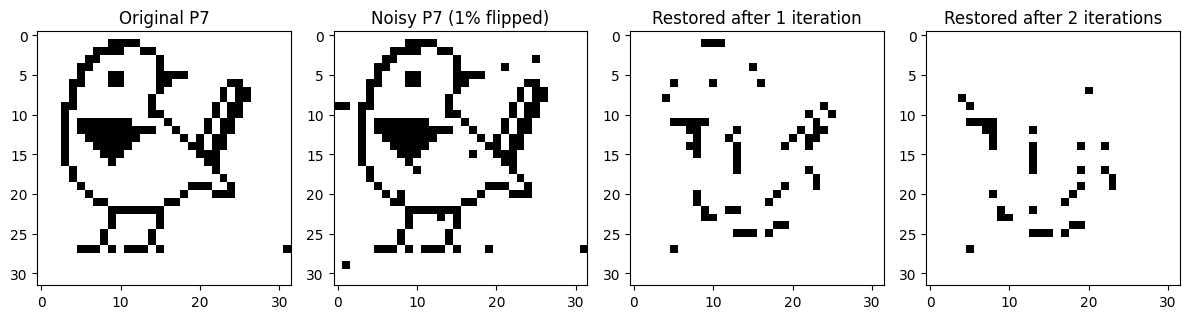

P7 after 1 iteration: 0.880859375
P7 after 2 iterations: 0.85546875


In [ ]:
# Set percent distortion
percent = 1
num_flips = int(percent * N / 100)

# Loop through each pattern
for idx, pattern in enumerate(patterns):
    print(f"Processing {pattern_names[idx]} with {percent}% distortion")

    # Flipping random indices
    random_indices = random.sample(range(N), num_flips)
    noisy_pattern = pattern.copy()

    # Apply random flips
    for i in random_indices:
        noisy_pattern[i] *= -1

    # Restore the pattern after 1 and 2 iterations
    restored_after_1 = updating_units(W, noisy_pattern)
    restored_after_2 = updating_units(W, restored_after_1)

    # Plots
    fig, axes = plt.subplots(1, 4, figsize=(12, 6))

    axes[0].imshow(pattern.reshape(32, 32).T, cmap='gray')
    axes[0].set_title(f'Original {pattern_names[idx]}')

    axes[1].imshow(noisy_pattern.reshape(32, 32).T, cmap='gray')
    axes[1].set_title(f'Noisy {pattern_names[idx]} ({percent}% flipped)')

    axes[2].imshow(restored_after_1.reshape(32, 32).T, cmap='gray')
    axes[2].set_title('Restored after 1 iteration')

    axes[3].imshow(restored_after_2.reshape(32, 32).T, cmap='gray')
    axes[3].set_title('Restored after 2 iterations')

    plt.tight_layout()
    plt.show()

    # Counting how many units match the original after restoration
    counter_after_1 = sum(1 for x, y in zip(restored_after_1, pattern) if x == y)
    counter_after_2 = sum(1 for x, y in zip(restored_after_2, pattern) if x == y)

    print(f"{pattern_names[idx]} after 1 iteration: {counter_after_1 / N}")
    print(f"{pattern_names[idx]} after 2 iterations: {counter_after_2 / N}")

 Try to repeat this with learning a few random patterns instead of the
pictures and see if you can store more.


In [ ]:
# Adding p4
# List of patterns and their labels

p_random = np.random.choice([-1, 1], size=N)  # Create a random pattern
patterns = [p1, p2, p3, p_random]
pattern_names = ['P1', 'P2', 'P3', 'Random']

W  = learning_weights(patterns, N)


Processing P1 with 1% distortion


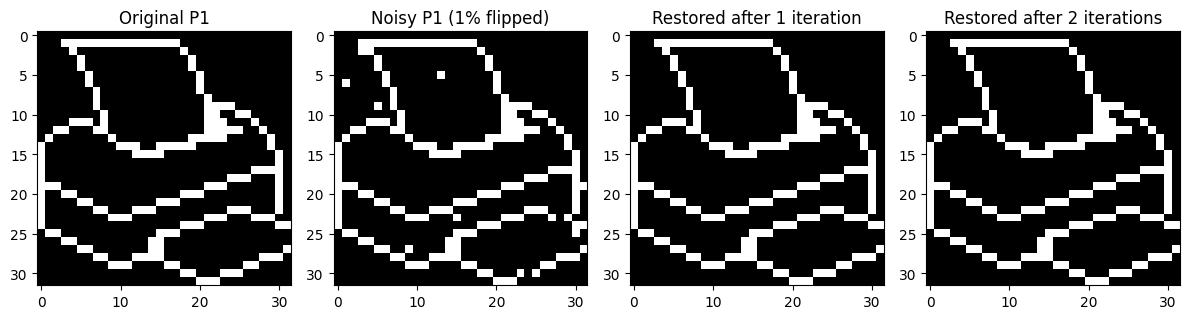

P1 after 1 iteration: 1.0
P1 after 2 iterations: 1.0
Processing P2 with 1% distortion


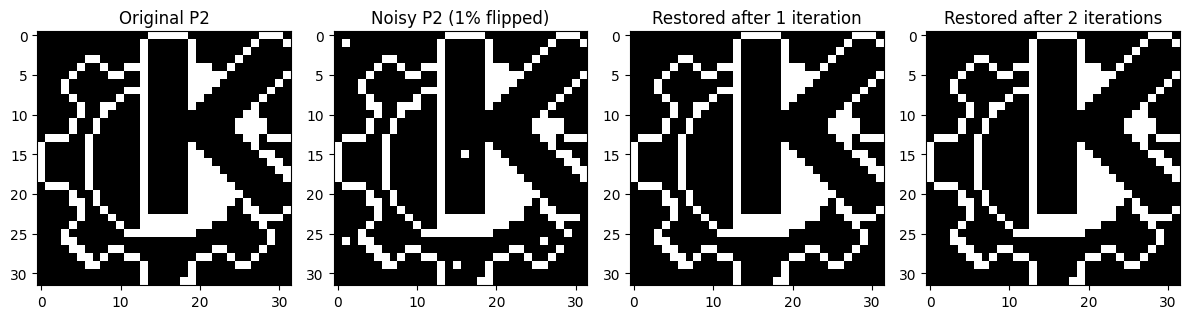

P2 after 1 iteration: 1.0
P2 after 2 iterations: 1.0
Processing P3 with 1% distortion


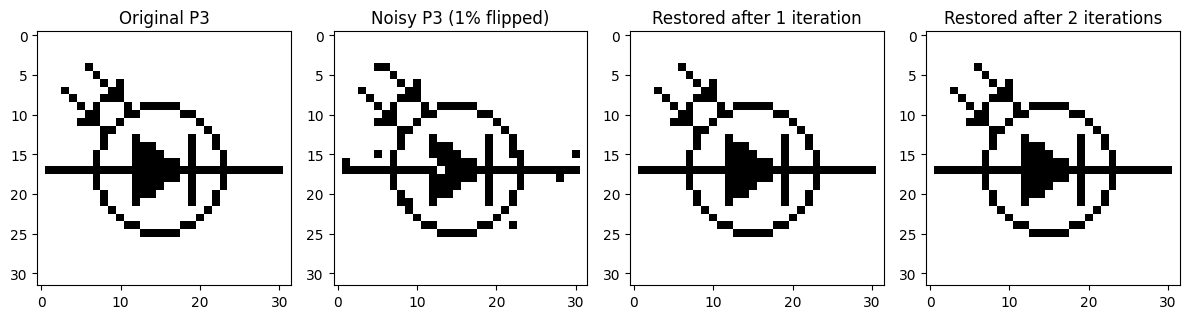

P3 after 1 iteration: 1.0
P3 after 2 iterations: 1.0
Processing Random with 1% distortion


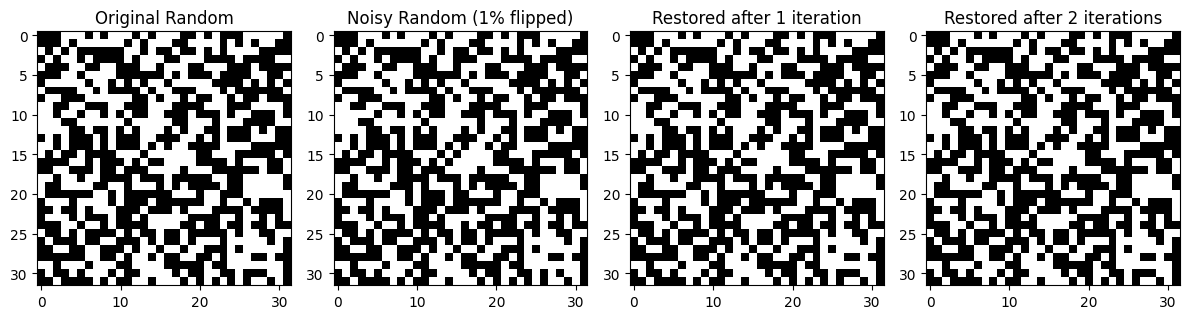

Random after 1 iteration: 1.0
Random after 2 iterations: 1.0


In [ ]:
# Set percent distortion
percent = 1
num_flips = int(percent * N / 100)

# Loop through each pattern
for idx, pattern in enumerate(patterns):
    print(f"Processing {pattern_names[idx]} with {percent}% distortion")

    # Flipping random indices
    random_indices = random.sample(range(N), num_flips)
    noisy_pattern = pattern.copy()

    # Apply random flips
    for i in random_indices:
        noisy_pattern[i] *= -1

    # Restore the pattern after 1 and 2 iterations
    restored_after_1 = updating_units(W, noisy_pattern)
    restored_after_2 = updating_units(W, restored_after_1)

    # Plots
    fig, axes = plt.subplots(1, 4, figsize=(12, 6))

    axes[0].imshow(pattern.reshape(32, 32).T, cmap='gray')
    axes[0].set_title(f'Original {pattern_names[idx]}')

    axes[1].imshow(noisy_pattern.reshape(32, 32).T, cmap='gray')
    axes[1].set_title(f'Noisy {pattern_names[idx]} ({percent}% flipped)')

    axes[2].imshow(restored_after_1.reshape(32, 32).T, cmap='gray')
    axes[2].set_title('Restored after 1 iteration')

    axes[3].imshow(restored_after_2.reshape(32, 32).T, cmap='gray')
    axes[3].set_title('Restored after 2 iterations')

    plt.tight_layout()
    plt.show()

    # Counting how many units match the original after restoration
    counter_after_1 = sum(1 for x, y in zip(restored_after_1, pattern) if x == y)
    counter_after_2 = sum(1 for x, y in zip(restored_after_2, pattern) if x == y)

    print(f"{pattern_names[idx]} after 1 iteration: {counter_after_1 / N}")
    print(f"{pattern_names[idx]} after 2 iterations: {counter_after_2 / N}")

    # performs better cause random pattern not correlated to pictures

Create 300 random patterns and train a 100-unit (or larger) network with
them. After each new pattern has been added to the weight matrix, calculate
how many of the earlier patterns remain stable (a single iteration does not cause
them to change) and plot it.

Text(0, 0.5, 'Accuracy')

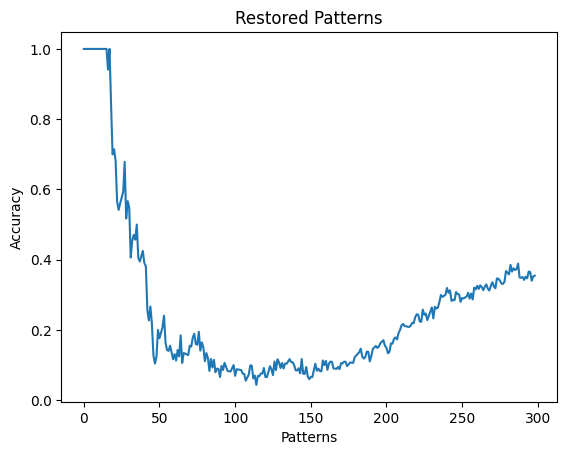

In [36]:
N = 100
P = 300

random_patterns = np.random.choice([-1, 1], size=(P, N))
counter_list = []

for i in range(0, P):
  random_pattern = random_patterns[:i]
  W  = learning_weights(random_pattern, N)

  counter = 0

  for j in range(i):
    restored_pattern = updating_units(W, random_patterns[j])
    if (restored_pattern == random_pattern[j]).all():
      counter += 1

  if i > 0:
    counter_list.append(counter / i)
  #print(f"Iteration {i}: {counter / (i+1)}")

plt.plot(counter_list)
plt.title('Restored Patterns')
plt.xlabel('Patterns')
plt.ylabel('Accuracy')



What happens if convergence to the pattern from a noisy version (a few flipped units) is used? What does the different behavior for large number
of patterns mean?

Text(0, 0.5, 'Accuracy')

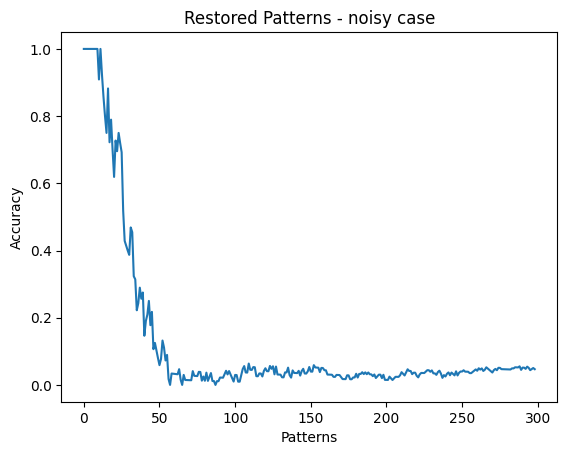

In [ ]:
N = 100
P = 300

random_patterns = np.random.choice([-1, 1], size=(P, N))
random_pattern_noisy = random_patterns.copy()
counter_list = []

percent = 1

# Flipping random indices
num_flips = int(percent * N / 100)

for i in range(0, P):

  random_indices = random.sample(range(N), num_flips)

  for j in random_indices:
      random_pattern_noisy[i][j] *= -1



for i in range(0, 300):
  random_pattern = random_patterns[:i]
  W  = learning_weights(random_pattern, N)

  counter = 0

  for j in range(i):
    restored_pattern = updating_units(W, random_pattern_noisy[j])
    if (restored_pattern == random_pattern[j]).all():
      counter += 1

  if i > 0:
    counter_list.append(counter / i)

plt.plot(counter_list)
plt.title('Restored Patterns - noisy case')
plt.xlabel('Patterns')
plt.ylabel('Accuracy')


What is the maximum number of retrievable patterns for this network?

(0.0, 50.0)

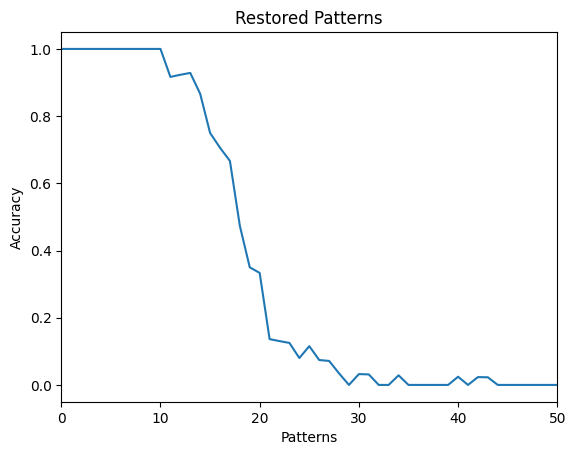

In [ ]:
random_patterns = np.random.choice([-1, 1], size=(P, N))
counter_list = []

for i in range(0, P):
  random_pattern = random_patterns[:i]
  W  = learning_weights(random_pattern, N)
  np.fill_diagonal(W, 0)

  counter = 0

  for j in range(i):
    restored_pattern = updating_units(W, random_patterns[j])
    if (restored_pattern == random_pattern[j]).all():
      counter += 1

  if i > 0:
    counter_list.append(counter / i)

  #print(f"Iteration {i}: {counter / (i+1)}")

plt.plot(counter_list)
plt.title('Restored Patterns')
plt.xlabel('Patterns')
plt.ylabel('Accuracy')
plt.xlim(0, 50)




(0.0, 50.0)

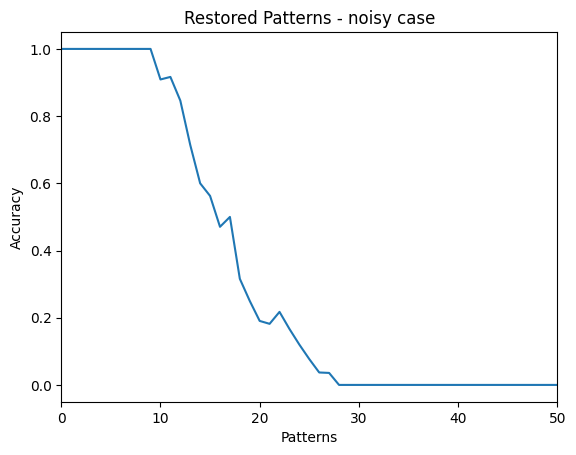

In [ ]:
random_patterns = np.random.choice([-1, 1], size=(P, N))
random_pattern_noisy = random_patterns.copy()
counter_list = []

percent = 1

# Flipping random indices
num_flips = int(percent * N / 100)

for i in range(0, P):

  random_indices = random.sample(range(N), num_flips)

  for j in random_indices:
      random_pattern_noisy[i][j] *= -1



for i in range(0, 300):
  random_pattern = random_patterns[:i]
  W  = learning_weights(random_pattern, N)
  np.fill_diagonal(W,0)

  counter = 0

  for j in range(i):
    restored_pattern = updating_units(W, random_pattern_noisy[j])
    if (restored_pattern == random_pattern[j]).all():
      counter += 1

  if i > 0:
    counter_list.append(counter / i)

plt.plot(counter_list)
plt.title('Restored Patterns - noisy case')
plt.xlabel('Patterns')
plt.ylabel('Accuracy')
plt.xlim(0, 50)

What happens if you bias the patterns, e.g. use sign(0.5+randn(300,100))
or something similar to make them contain more +1? How does this relate
to the capacity results of the picture patterns?

(0.0, 50.0)

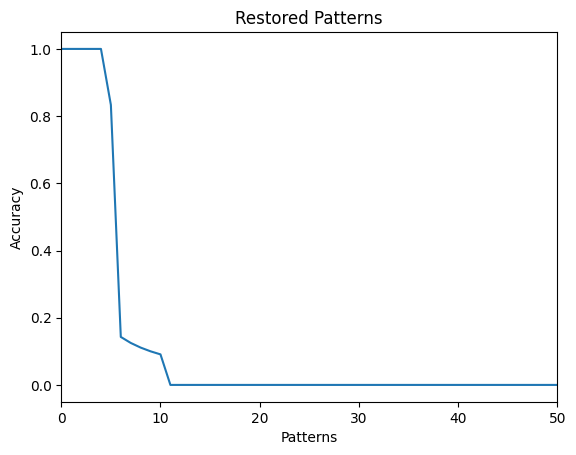

In [ ]:
pattern_shifted = np.sign(0.5 + np.random.randn(P, N))
counter_list = []

for i in range(0, P):
  random_pattern = pattern_shifted[:i]
  W  = learning_weights(random_pattern, N)
  np.fill_diagonal(W, 0)

  counter = 0

  for j in range(i):
    restored_pattern = updating_units(W, pattern_shifted[j])
    if (restored_pattern == random_pattern[j]).all():
      counter += 1

  if i > 0:
    counter_list.append(counter / i)
  #print(f"Iteration {i}: {counter / (i+1)}")

plt.plot(counter_list)
plt.title('Restored Patterns')
plt.xlabel('Patterns')
plt.ylabel('Accuracy')
plt.xlim(0, 50)



Text(0, 0.5, 'Accuracy')

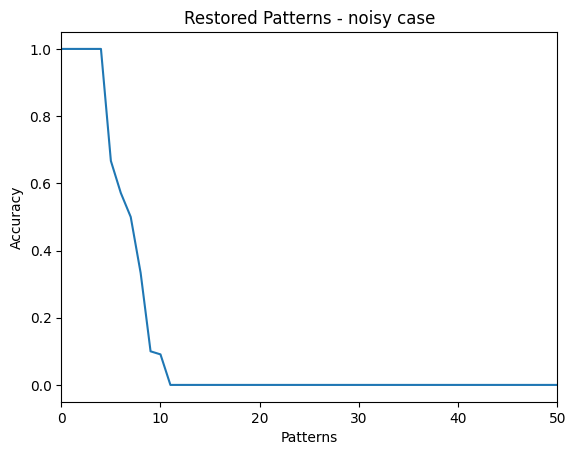

In [ ]:
pattern_shifted = np.sign(0.5 + np.random.randn(P, N))
random_pattern_noisy = pattern_shifted.copy()
counter_list = []

percent = 1

# Flipping random indices
num_flips = int(percent * N / 100)

for i in range(0, P):

  random_indices = random.sample(range(N), num_flips)

  for j in random_indices:
      random_pattern_noisy[i][j] *= -1


for i in range(0, 300):
  random_pattern = pattern_shifted[:i]
  W  = learning_weights(random_pattern, N)
  np.fill_diagonal(W,0)

  counter = 0

  for j in range(i):
    restored_pattern = updating_units(W, random_pattern_noisy[j])
    if (restored_pattern == random_pattern[j]).all():
      counter += 1

  if i > 0:
    counter_list.append(counter / i)
  #print(f"Iteration {i}: {counter / (i+1)}")

plt.plot(counter_list)
plt.title('Restored Patterns - noisy case')
plt.xlabel('Patterns')
plt.xlim(0, 50)
plt.ylabel('Accuracy')



3.6 Sparse Patterns

In [ ]:
random_patterns = np.zeros((P, N))

percent = 10

# Flipping random indices
num_flips = int(percent * N / 100)

for i in range(0, P):

  random_indices = random.sample(range(N), num_flips)

  for j in random_indices:
      random_patterns[i][j] = 1


average_activity = (1/(N*P))*np.sum(random_patterns)

In [ ]:
def learning_weights_sparse(input, size, rho):
  W  = np.einsum('ik,ij->kj', (input - rho), (input - rho))/size   # computing weights
  return W

def updating_units_sparse(weights, input, bias):
  weighted_sum = np.dot(weights, input)  # This gives Σ_j W_ij * x_j for all i
  output = 0.5 + 0.5 * np.sign(weighted_sum - bias)
  return output

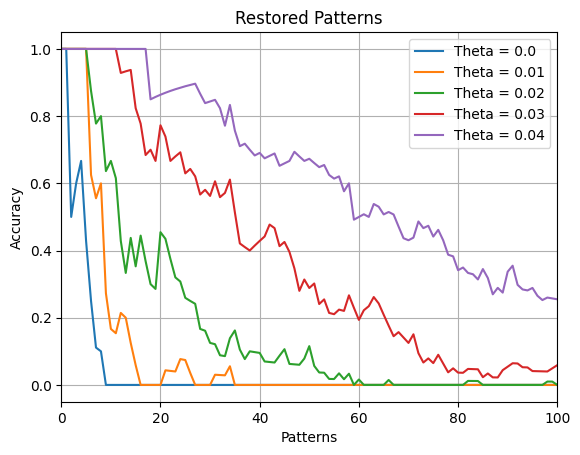

In [ ]:
theta_list = np.array([0, 0.01, 0.02, 0.03, 0.04])

counter_list = np.zeros((theta_list.shape[0], P))

# Simulation loop
for theta in range(theta_list.shape[0]):
    for i in range(1, P):  # Start from 1 to avoid empty slices
        random_pattern = random_patterns[:i+1]
        W = learning_weights_sparse(random_pattern, N, average_activity)

        counter = 0
        for j in range(i+1):
            restored_pattern = updating_units_sparse(W, random_pattern[j], theta_list[theta])
            if (restored_pattern == random_pattern[j]).all():
                counter += 1

        counter_list[theta][i] = (counter / (i+1))

# Plot the results
for theta_idx, theta_value in enumerate(theta_list):
    plt.plot(counter_list[theta_idx][1:], label=f'Theta = {theta_value}')

# Customize the plot
plt.title('Restored Patterns')
plt.xlabel('Patterns')
plt.ylabel('Accuracy')
plt.legend()  # Add legend for clarity
plt.grid(True)
plt.xlim(0, 100)
plt.show()

 What about even sparser patterns (ρ = 0.05 or 0.01)?


In [ ]:
random_patterns = np.zeros((P, N))

percent = 1

# Flipping random indices
num_flips = int(percent * N / 100)

for i in range(0, P):

  random_indices = random.sample(range(N), num_flips)

  for j in random_indices:
      random_patterns[i][j] = 1


average_activity = (1/(N*P))*np.sum(random_patterns)


In [ ]:
theta_list = np.array([0.01])

counter_list_1 = np.zeros((theta_list.shape[0], P))

# Simulation loop
for theta in range(theta_list.shape[0]):
    for i in range(1, P):  # Start from 1 to avoid empty slices
        random_pattern = random_patterns[:i+1]
        W = learning_weights_sparse(random_pattern, N, average_activity)

        counter = 0
        for j in range(i+1):
            restored_pattern = updating_units_sparse(W, random_pattern[j], theta_list[theta])
            if (restored_pattern == random_pattern[j]).all():
                counter += 1

        counter_list_1[theta][i] = (counter / (i+1))


In [ ]:
random_patterns = np.zeros((P, N))

percent = 5

# Flipping random indices
num_flips = int(percent * N / 100)

for i in range(0, P):

  random_indices = random.sample(range(N), num_flips)

  for j in random_indices:
      random_patterns[i][j] = 1


average_activity = (1/(N*P))*np.sum(random_patterns)

In [ ]:
theta_list = np.array([0.01])

counter_list_5 = np.zeros((theta_list.shape[0], P))

# Simulation loop
for theta in range(theta_list.shape[0]):
    for i in range(1, P):  # Start from 1 to avoid empty slices
        random_pattern = random_patterns[:i+1]
        W = learning_weights_sparse(random_pattern, N, average_activity)

        counter = 0
        for j in range(i+1):
            restored_pattern = updating_units_sparse(W, random_pattern[j], theta_list[theta])
            if (restored_pattern == random_pattern[j]).all():
                counter += 1

        counter_list_5[theta][i] = (counter / (i+1))

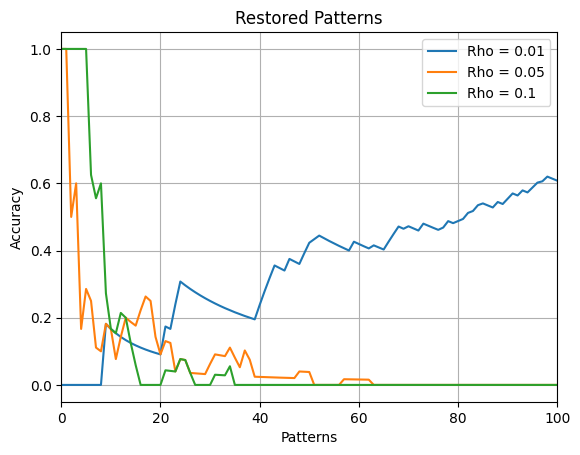

In [ ]:
# Plot the results


plt.plot(counter_list_1[0][1:], label=f'Rho = {0.01}')
plt.plot(counter_list_5[0][1:], label=f'Rho = {0.05}')
plt.plot(counter_list[1][1:], label=f'Rho = {0.1}')

# Customize the plot
plt.title('Restored Patterns')
plt.xlabel('Patterns')
plt.ylabel('Accuracy')
plt.legend()  # Add legend for clarity
plt.grid(True)
plt.xlim(0, 100)
plt.show()